출처 : https://github.com/bwcho75/dataanalyticsandML/tree/master/Clustering

IRIS 데이터에 대해 클러스터링을 해보고 모델 평가를 하는 코드입니다.    
이 코드에서는 교차표를 이용해 결과를 확인하는데, 이 외에도 파라머_Clustering.ipynb에 나오는 silhouette_score나 수업시간에 배운 다른 모델 평가 방식을 사용해보길 바랍니다.    
과제 #3은 Mall_Customer.csv 데이터를 불러오고, 전처리와 EDA를 한 후,    
수업시간에 배운 아래의 세 가지 방법 + 새로운 방법 최소 한 가지를 이용해 Clustering을 하고      
하이퍼파라미터도 변화시켜보고    
다양한 Clustering 방법에 대해 비교/평가하는 과제입니다.

# Data  & Preprocessing & EDA 

## Read Mall_Customers data & Set target

In [1]:

import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt 
import seaborn as sns

#일반적인 경고 메세지는 무시함
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('Mall_Customers.csv',encoding ='cp949')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# CustomerID column 제외
data = data.drop('CustomerID',axis = 1)

data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Preprocessing

### Encoding

Gender를 encoding 해주자
Male : 0   Female : 1

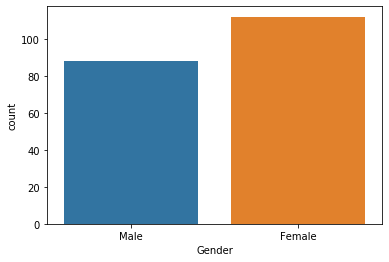

In [3]:
sns.countplot(data.Gender)

In [4]:
def x(x):
    if x == "Male":
        return 0 # 성별이 남성이면(Male) 0반환
    else:
        return 1 # 성별이 여성이면(Female) 1 반환(Female인 경우가 더 많으므로 else로 처리)
        
data['Gender'] = data['Gender'].apply(x)


In [5]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## Set target

target 변수는 categorical한 Gender로 설정 

In [6]:
labels = pd.DataFrame(data.Gender)
labels.columns=['Gender']


feature = data[['Age','Annual Income (k$)','Spending Score (1-100)']]

### Scaling (Min-Max scaling)

sklearn의 MinMaxScaler이용

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
#scaler = MinMaxScaler()
#data = scaler.fit_transform(data)

In [9]:
# scaling잘 되었는지 확인
data


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


음 scaling이 잘됐군!!

## EDA

feature두개씩 비교하여 군집이 나누어 지는지 확인한다..

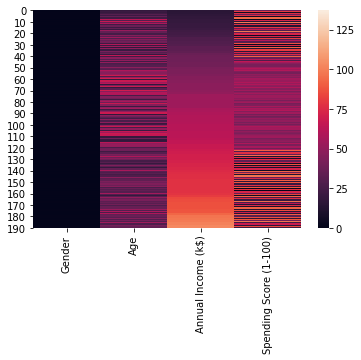

In [10]:
sns.heatmap(data)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

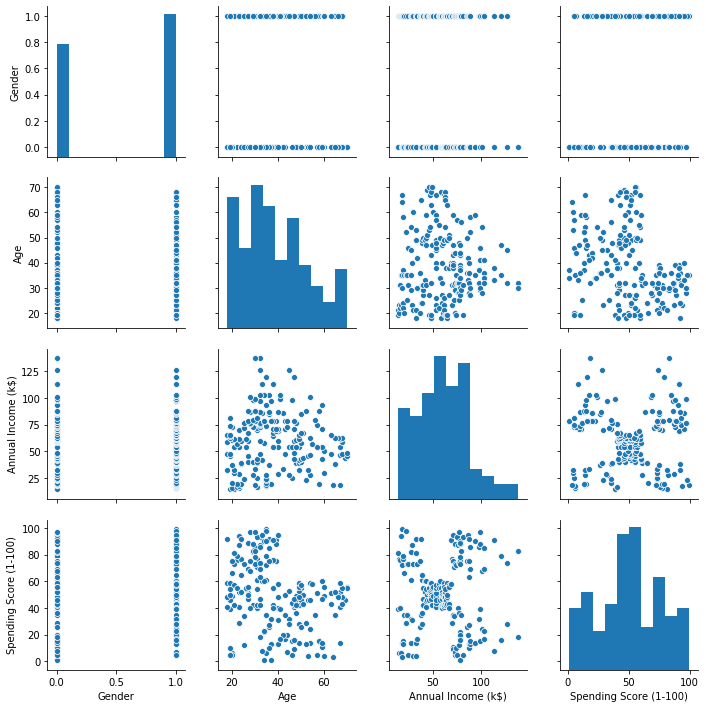

In [11]:
sns.pairplot(data)
plt.plot

Spending Score(1-100)과 Annual Income(k$)의 pairplot을 보면, 군집이 5개로 나뉘는 것을 대략 확인할 수 있다.


# 1. Hierarchical Clustering

## Dendrogram

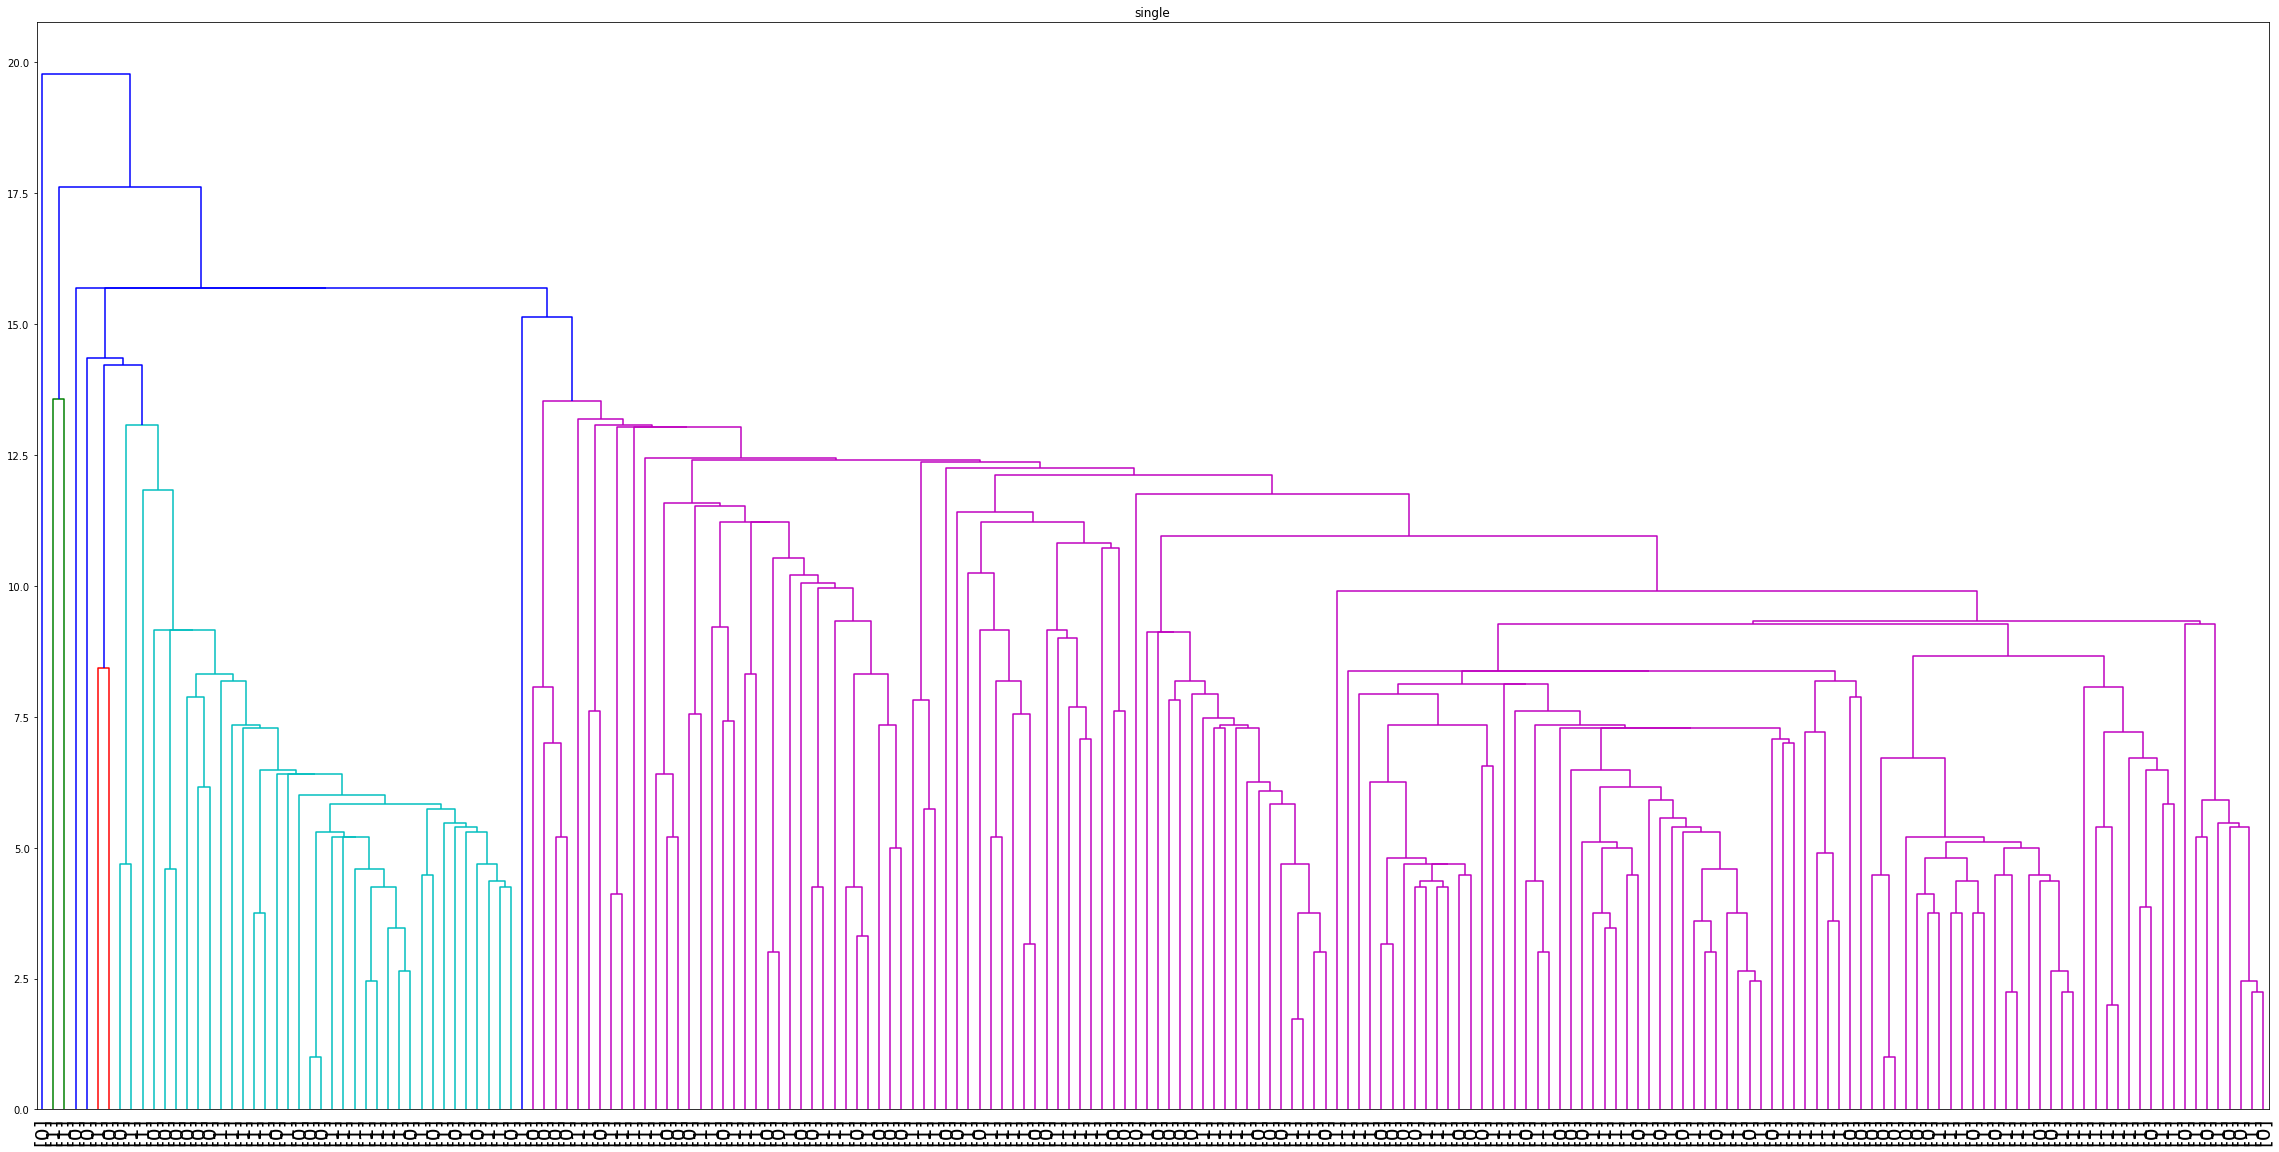

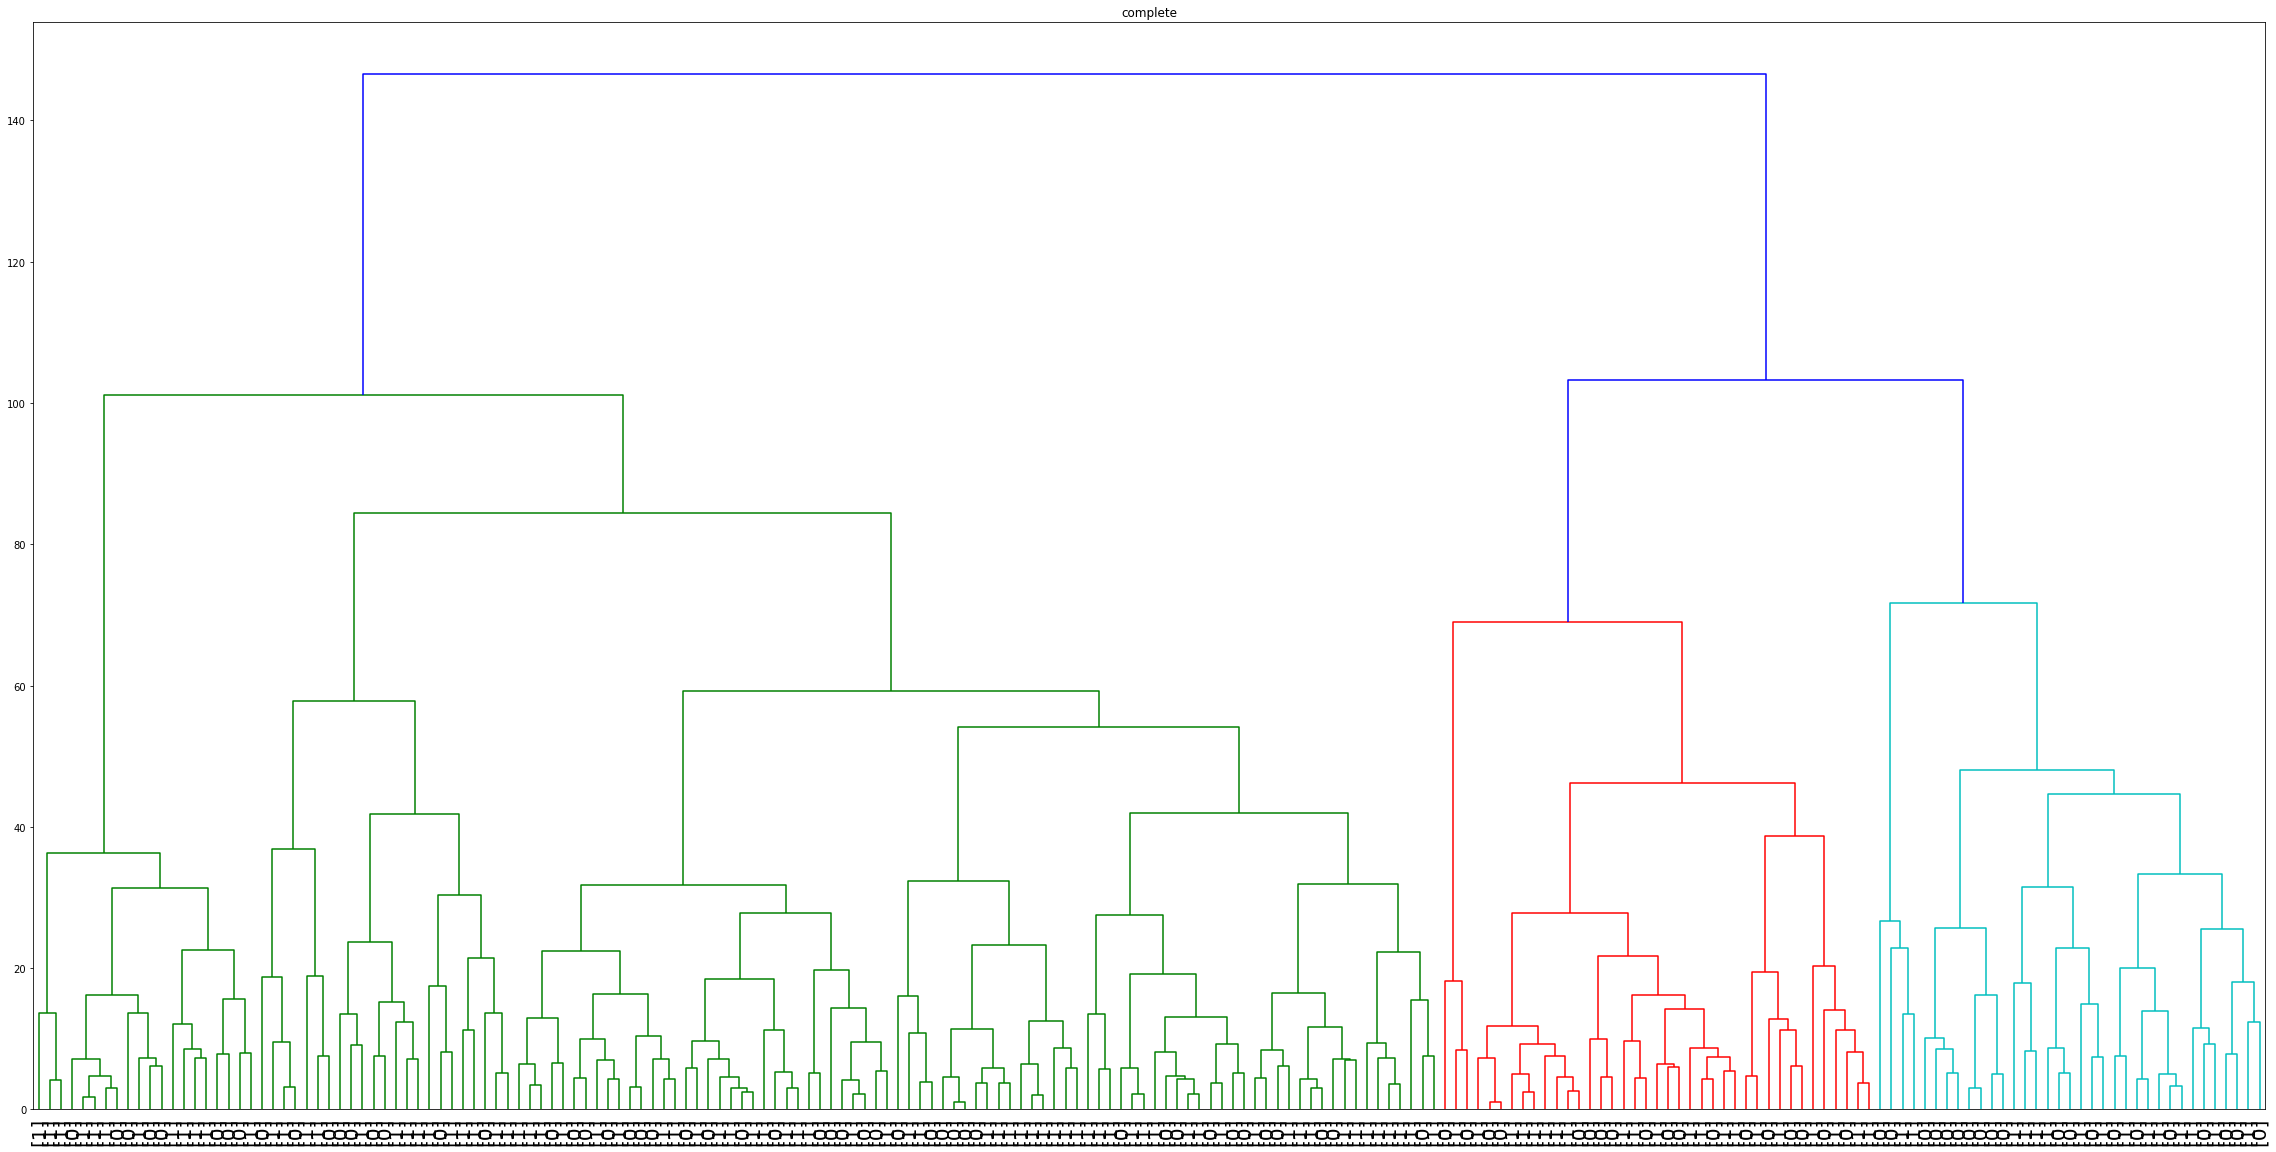

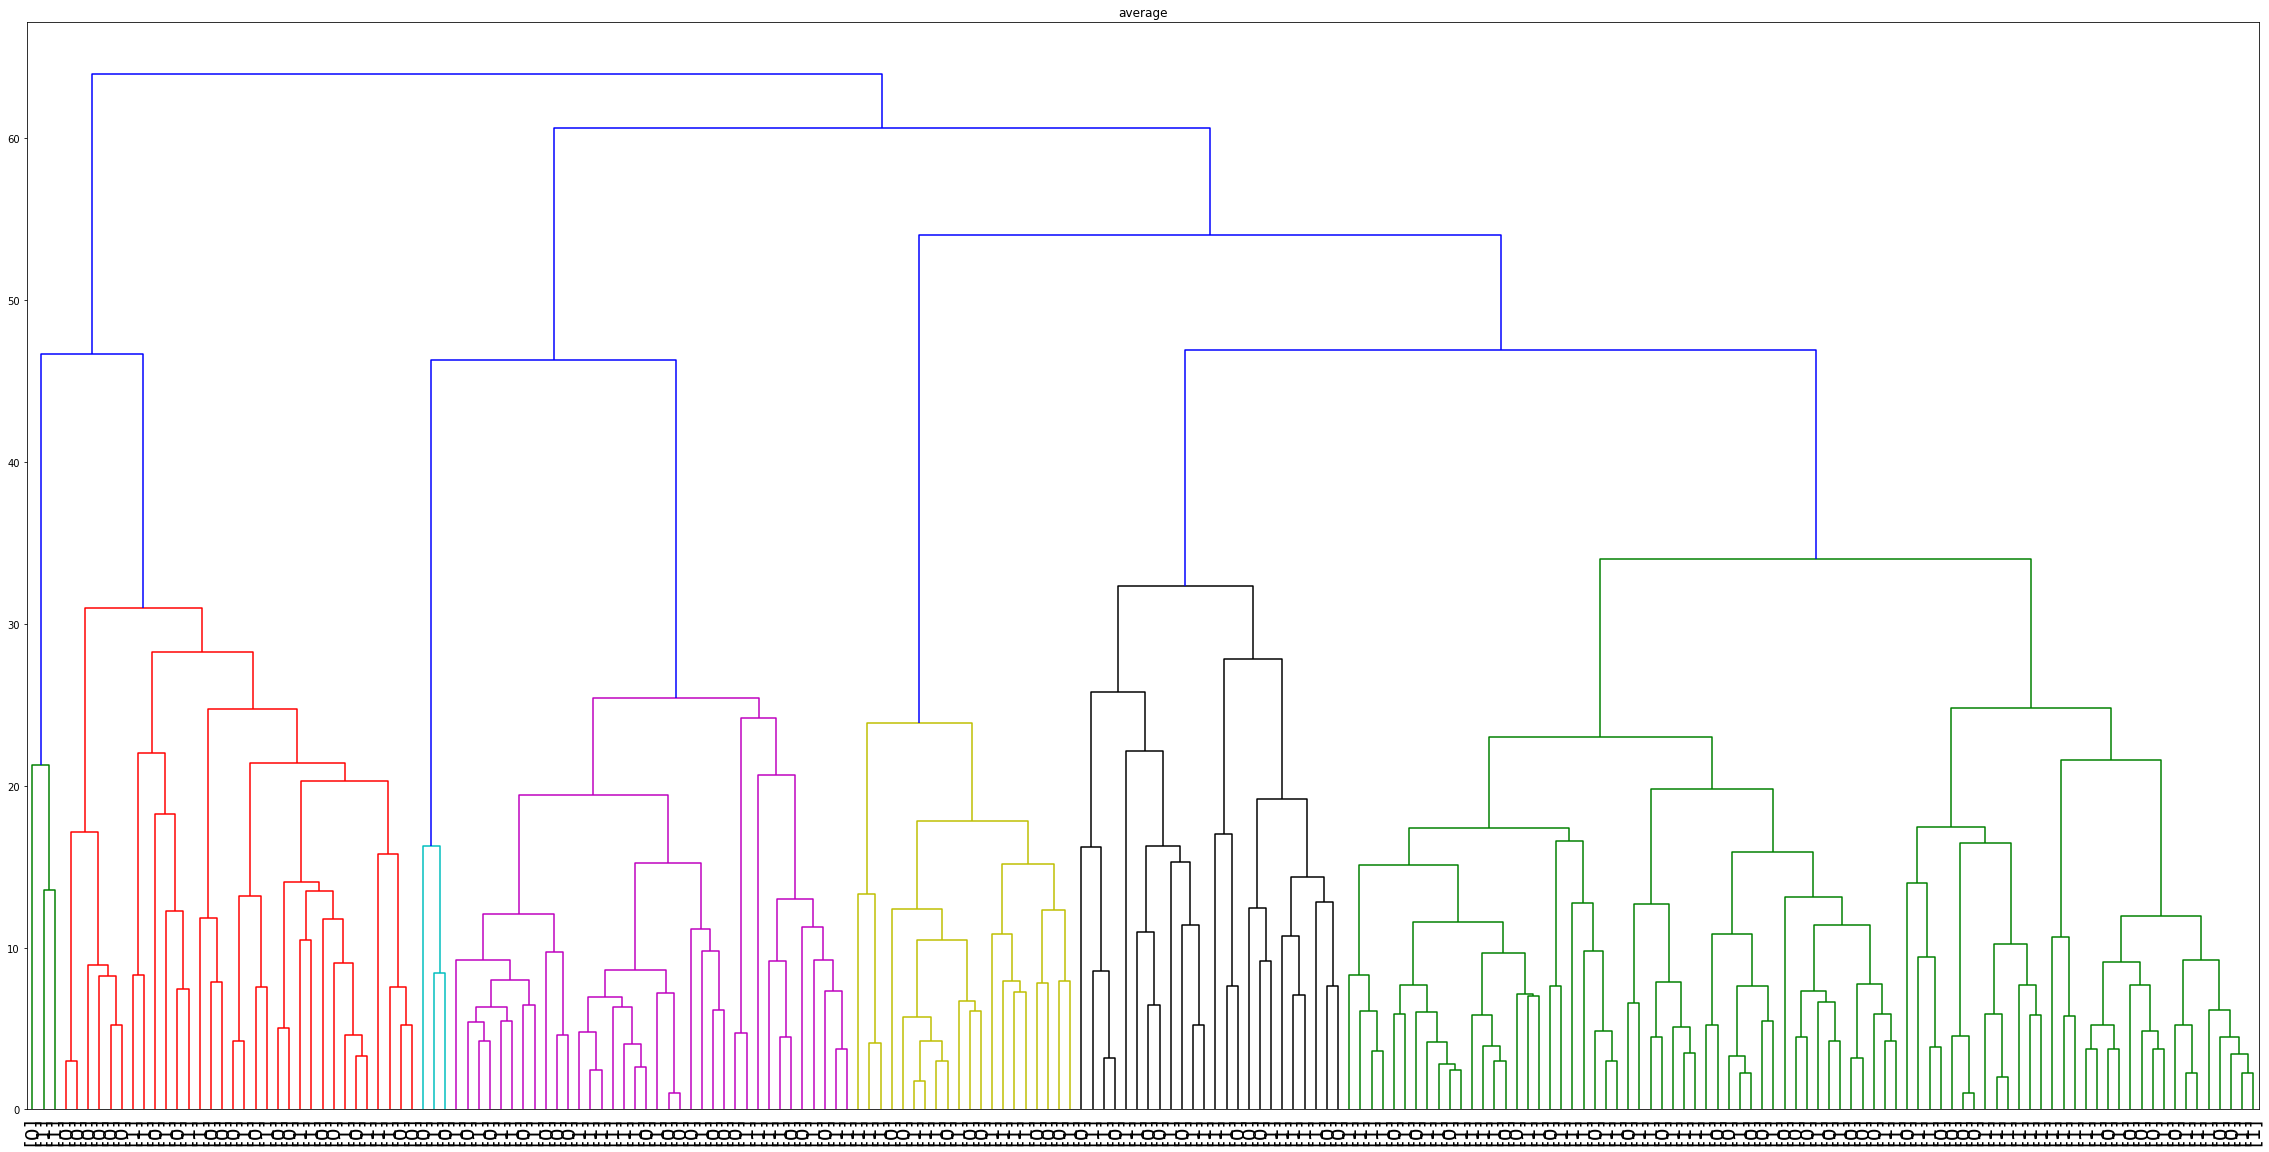

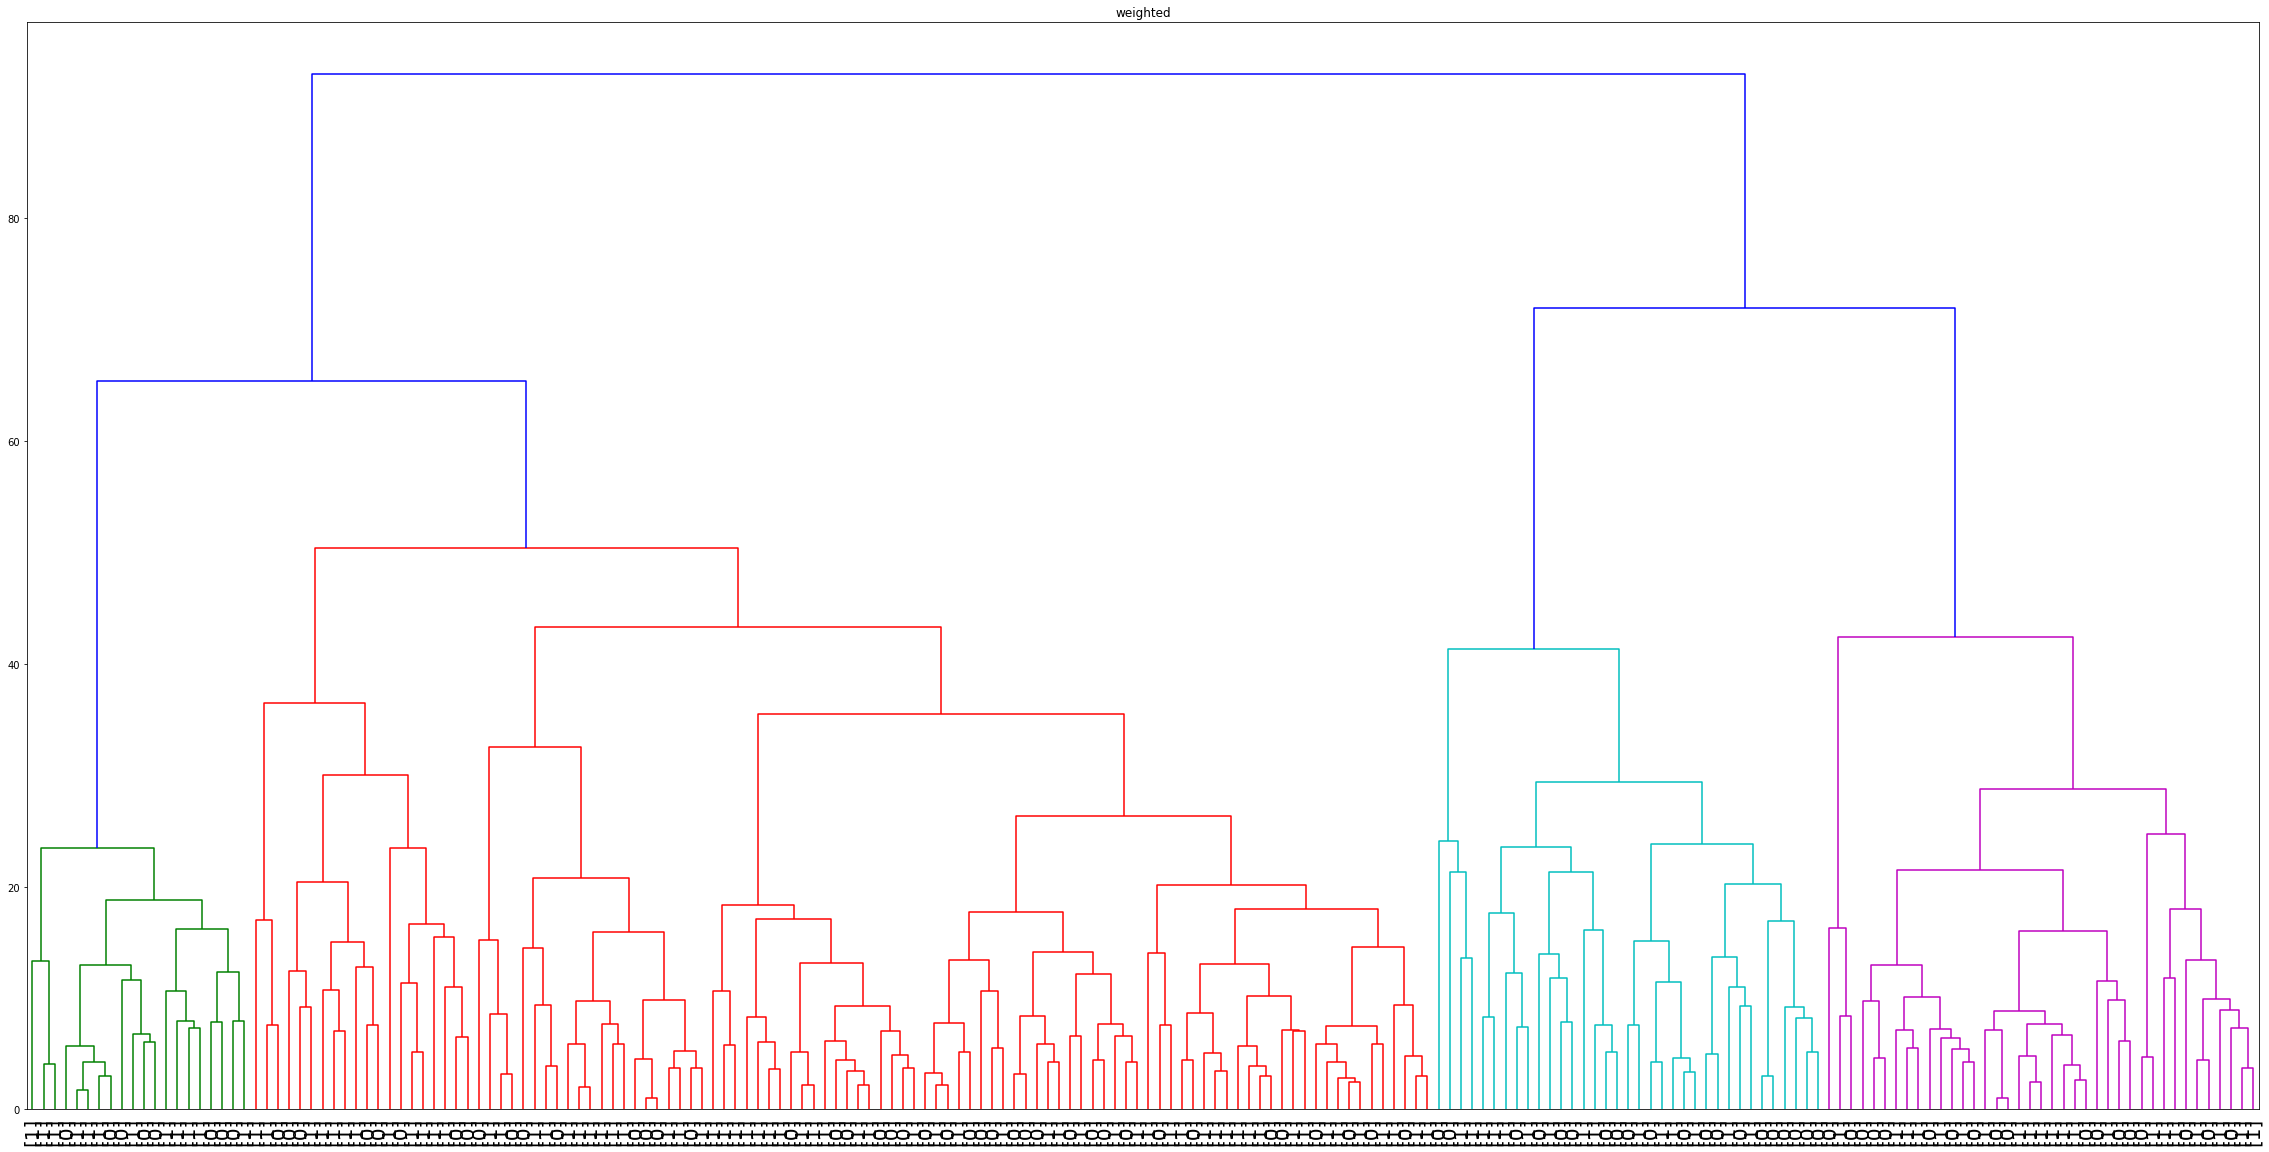

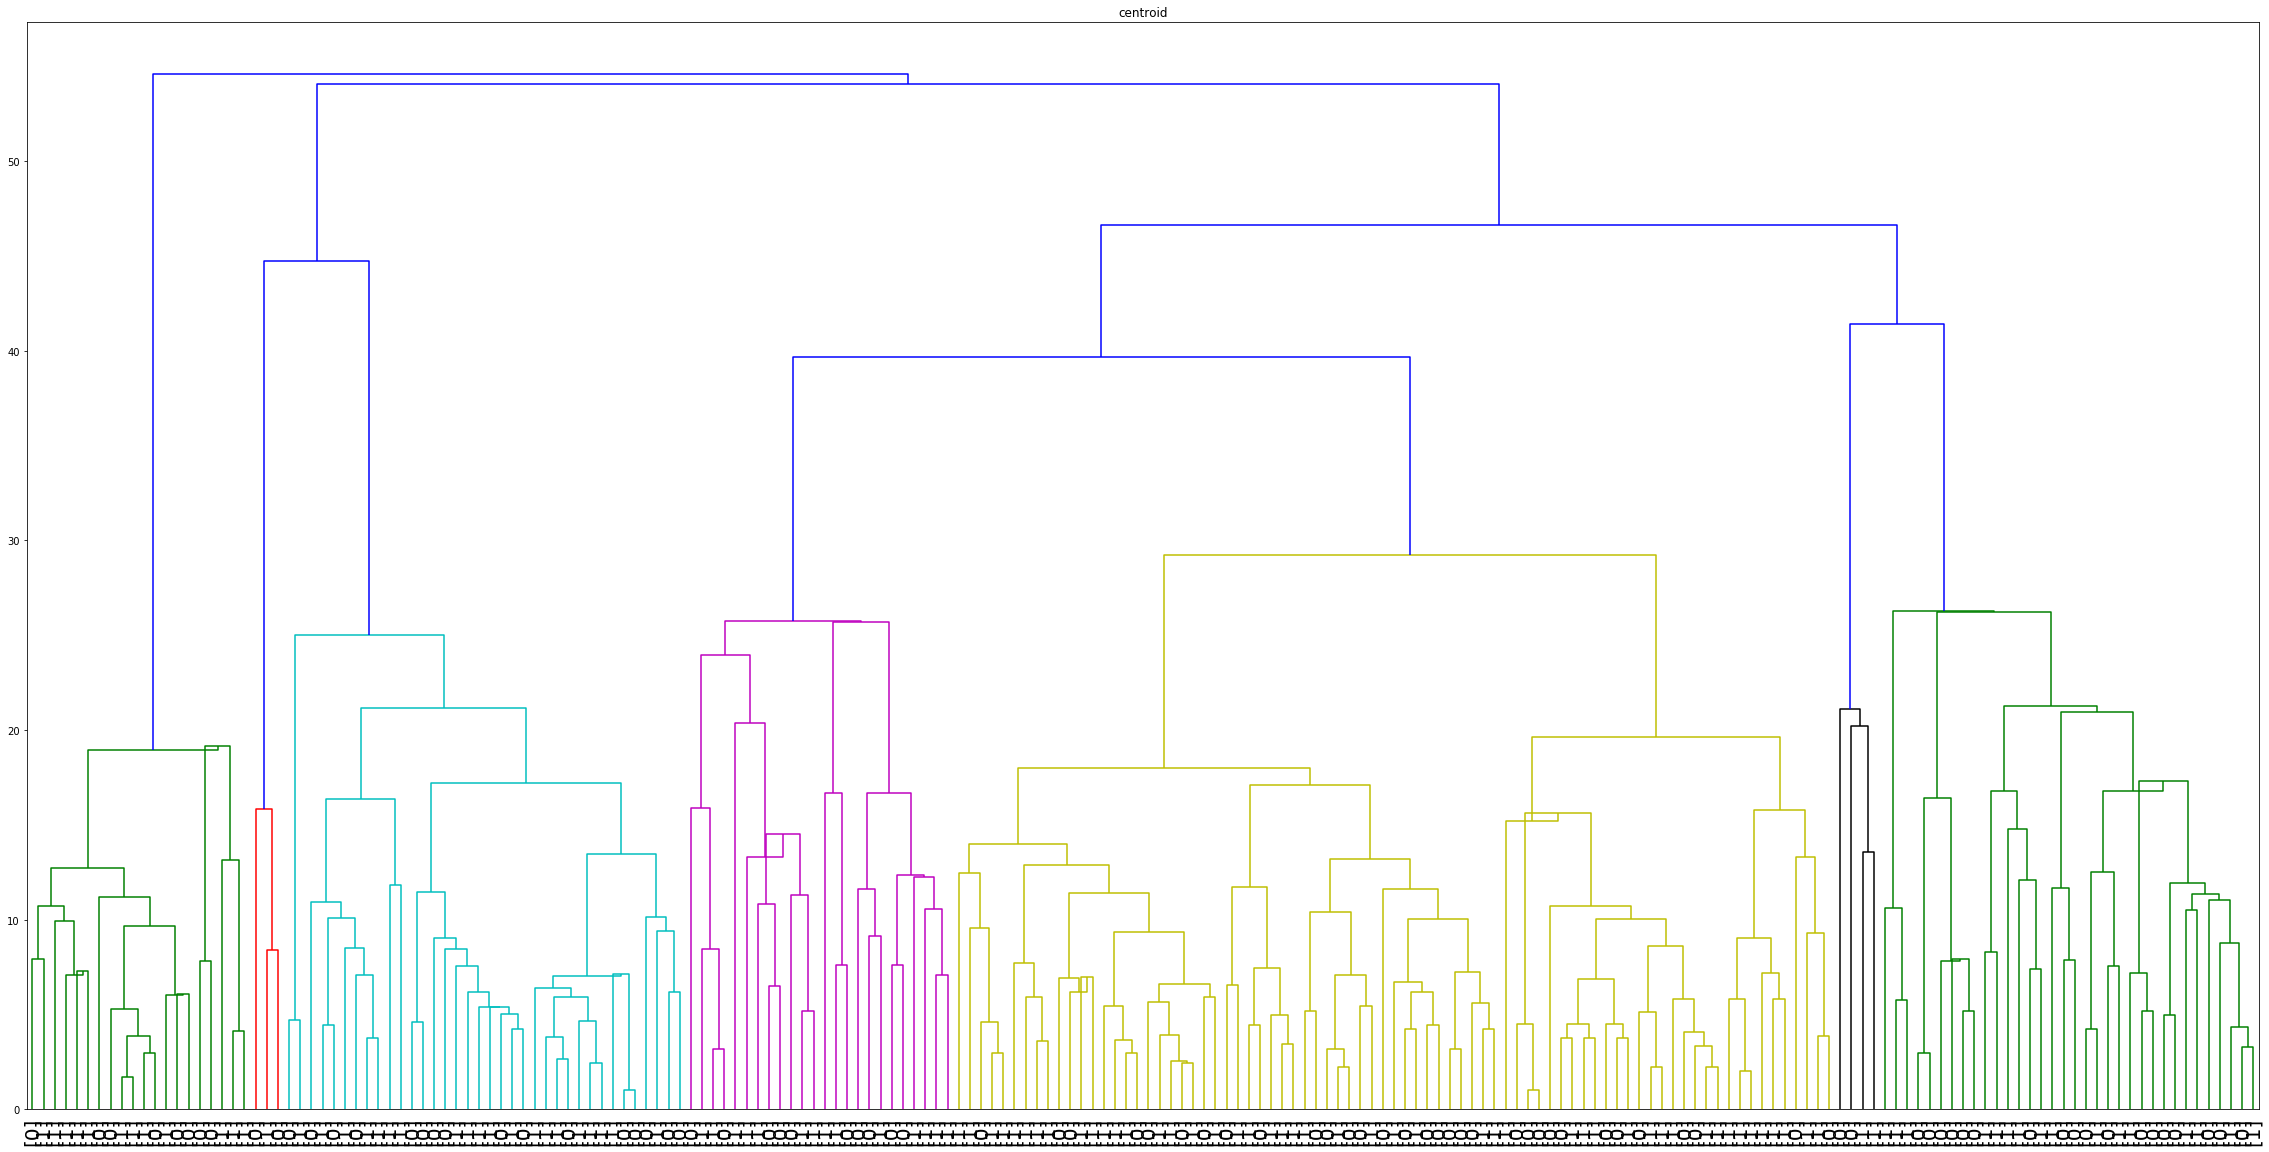

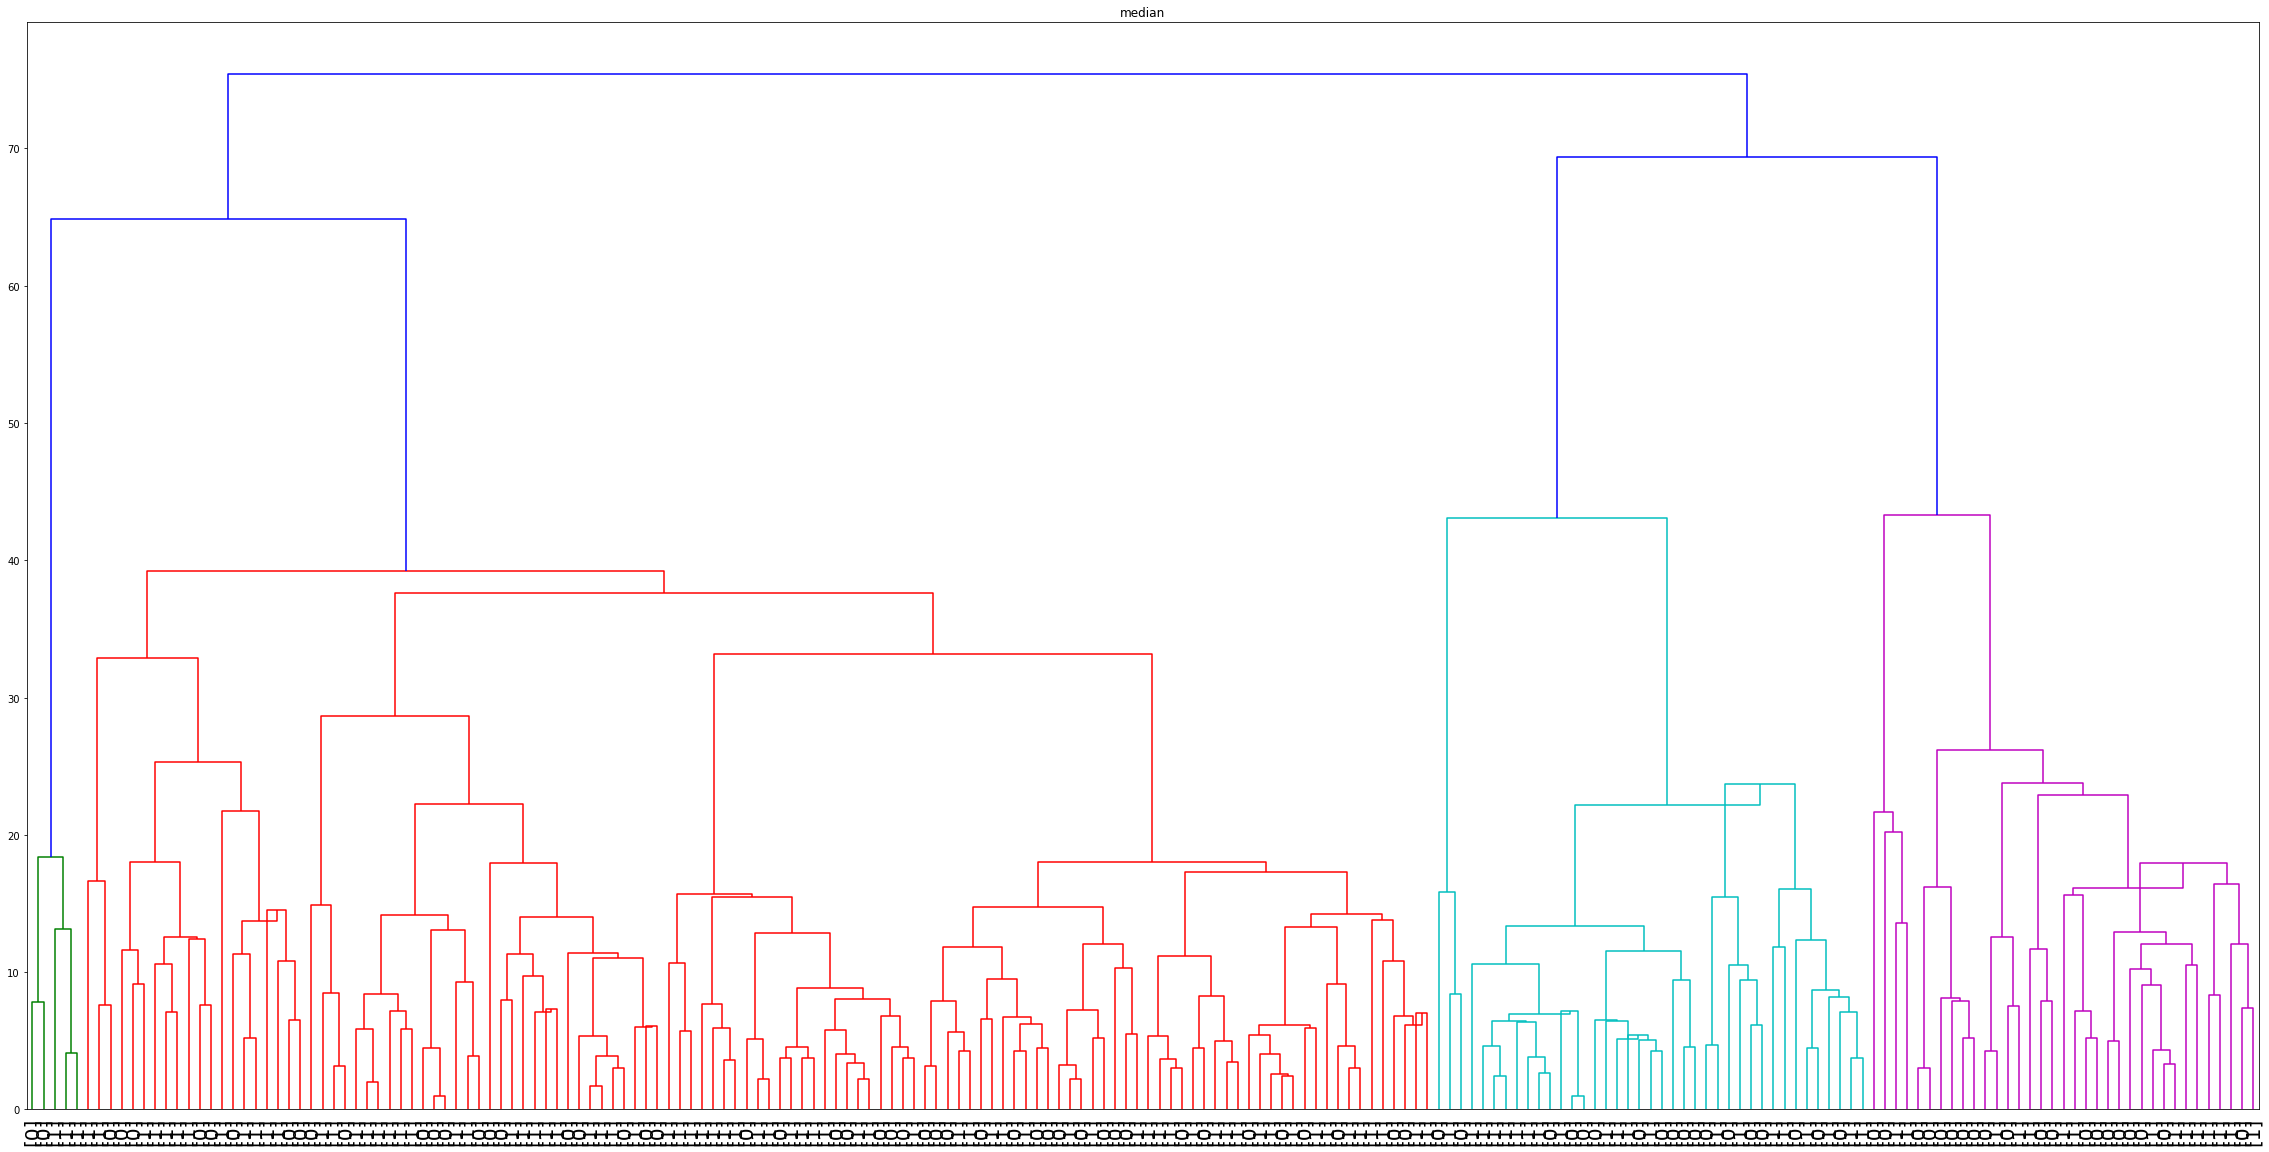

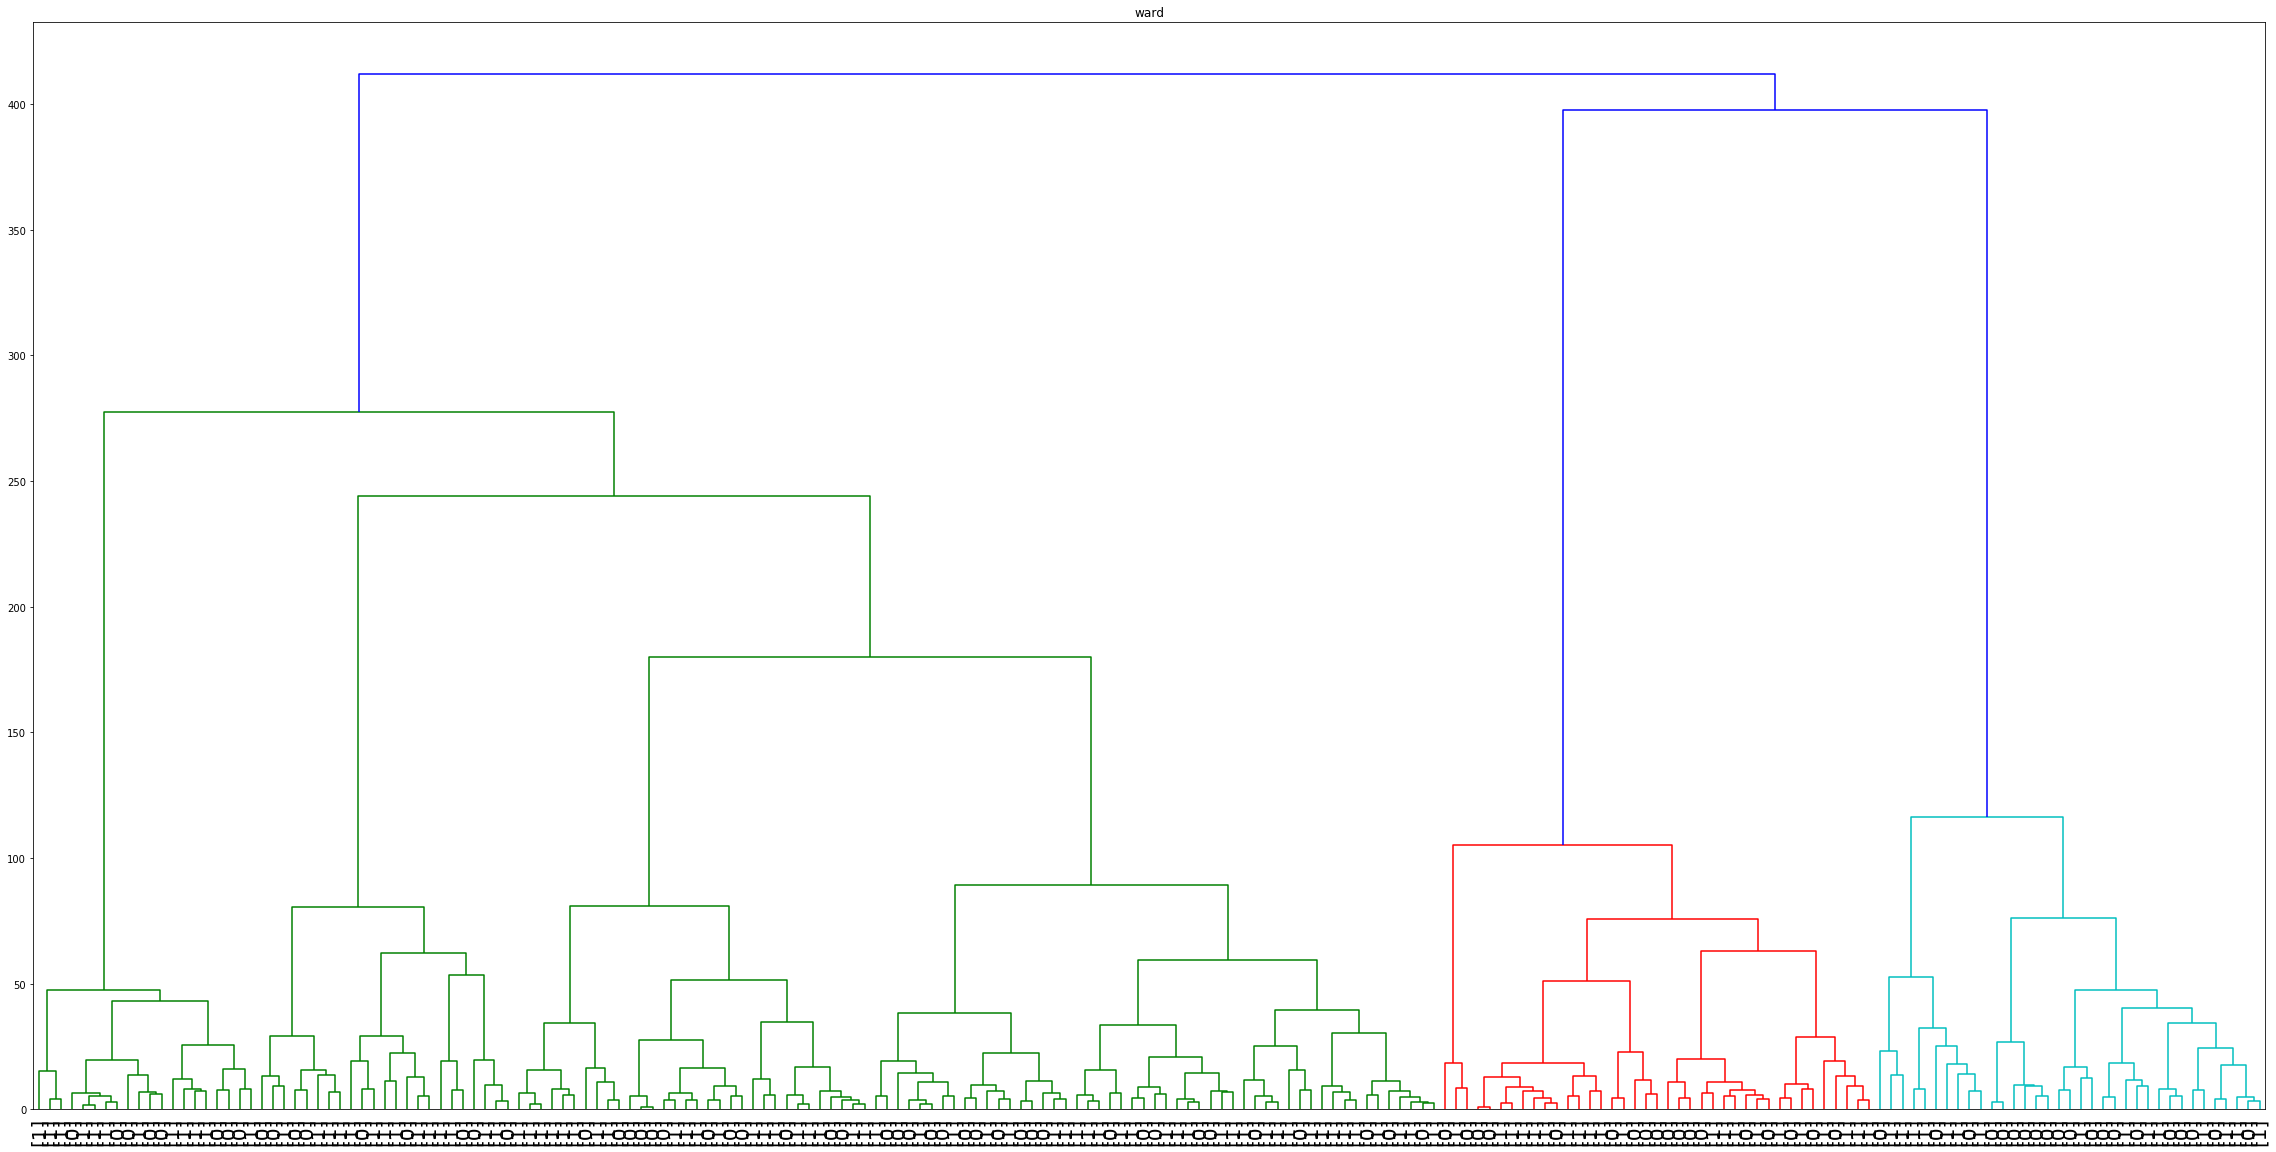

In [12]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
#method 별로 dendrogram 그리기

method = ['single','complete', 'average', 'weighted', 'centroid', 'median', 'ward']

#label설정한 경우
for i in method:
    mergings = linkage(data, method= i)

    # Plot the dendrogram, using varieties as labels
    plt.figure(figsize=(40,20))
    dendrogram(mergings,
               labels = labels.as_matrix(columns=['Gender']),
               leaf_rotation=90,
               leaf_font_size=20,)
    plt.title(i)
    plt.show()
 #'single','complete', 'average', 'weighted', 'centroid', 'median', 'ward' 순서대로 plot


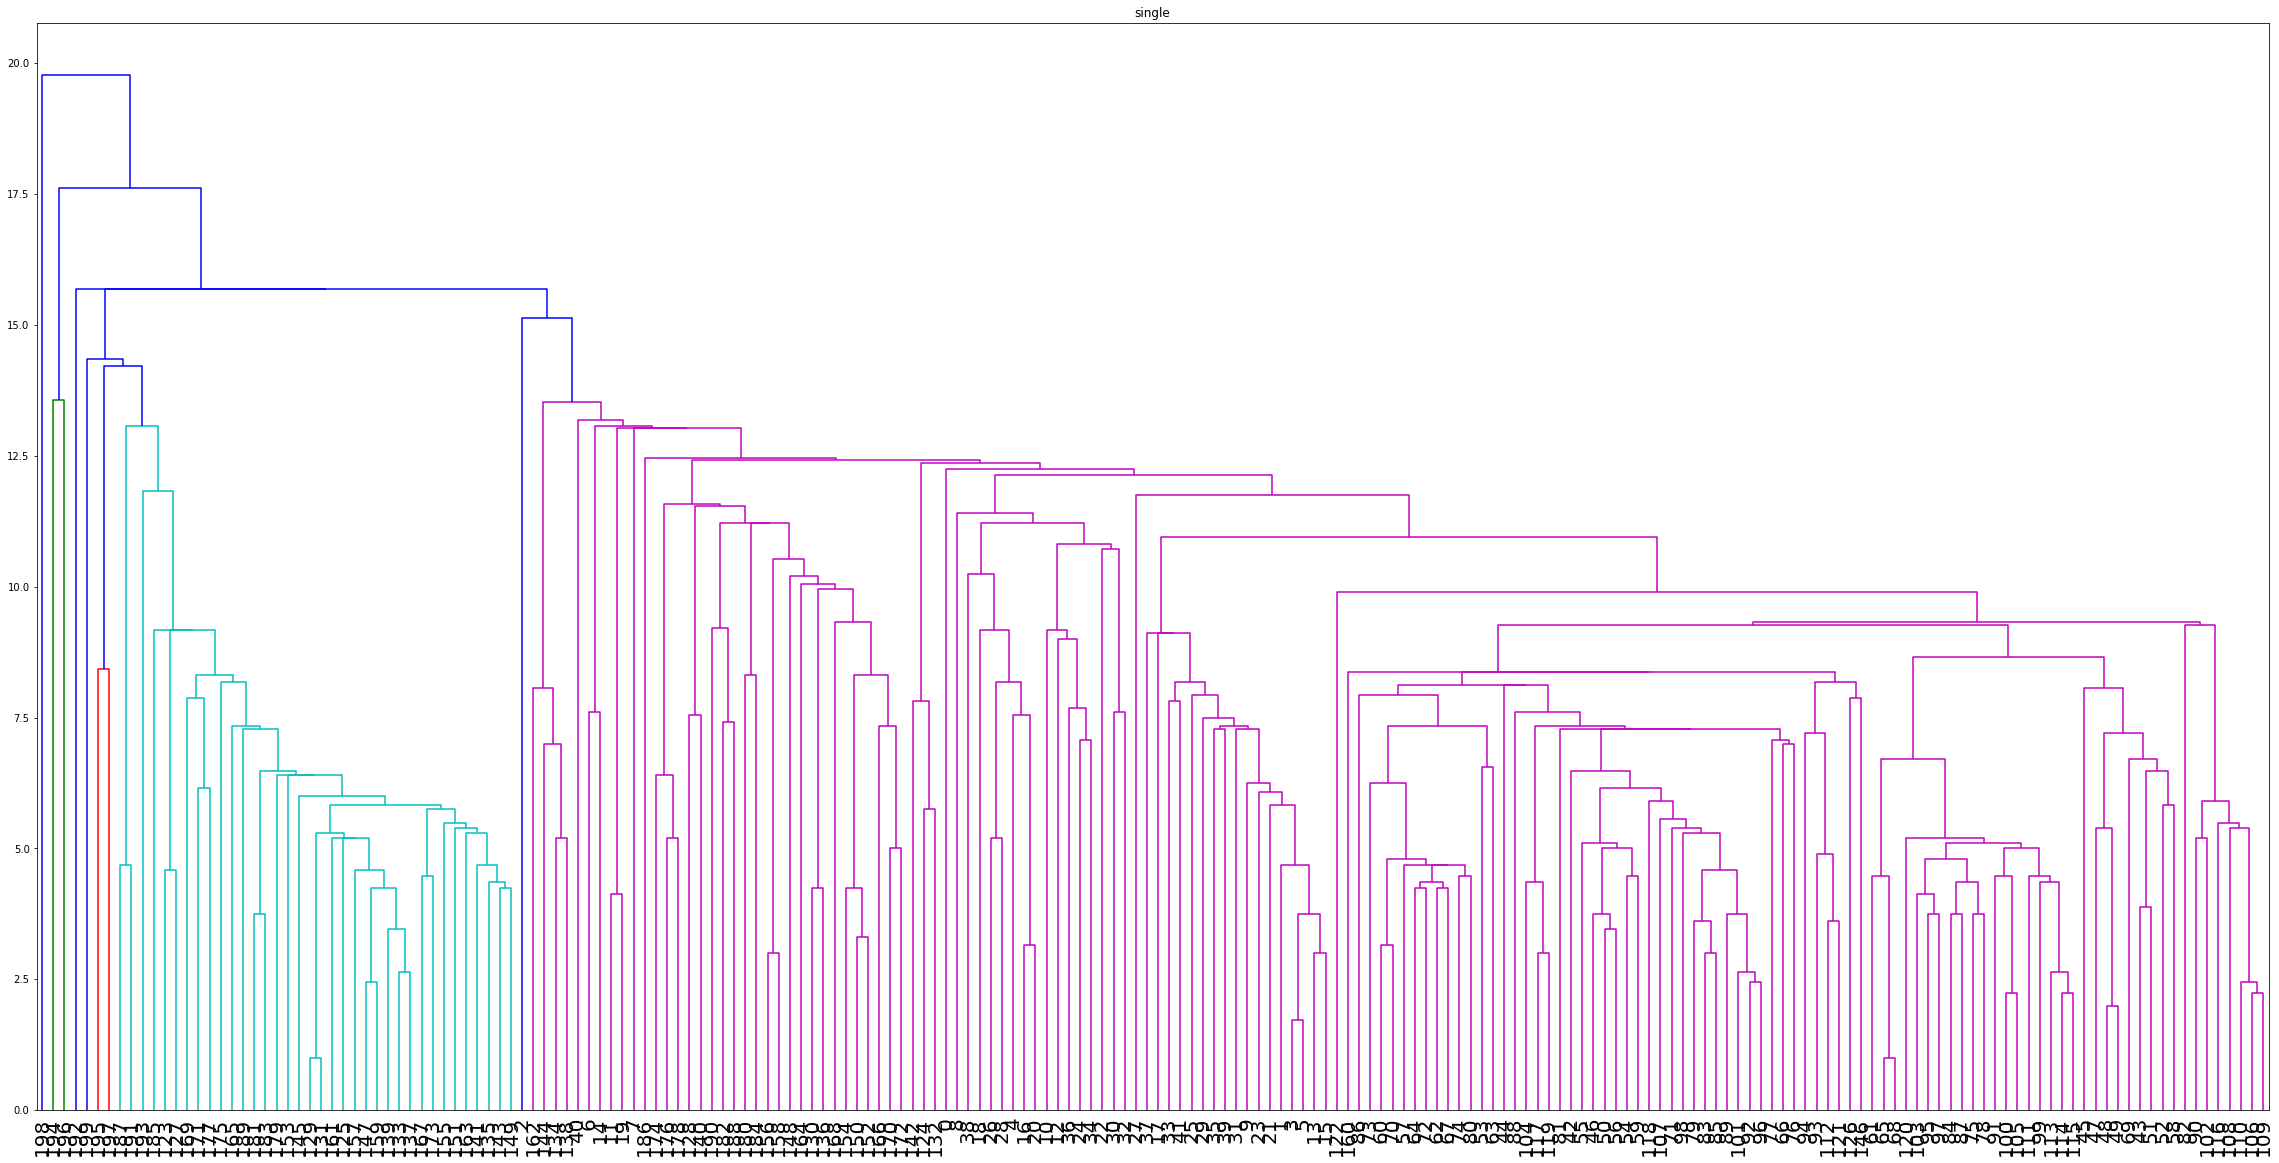

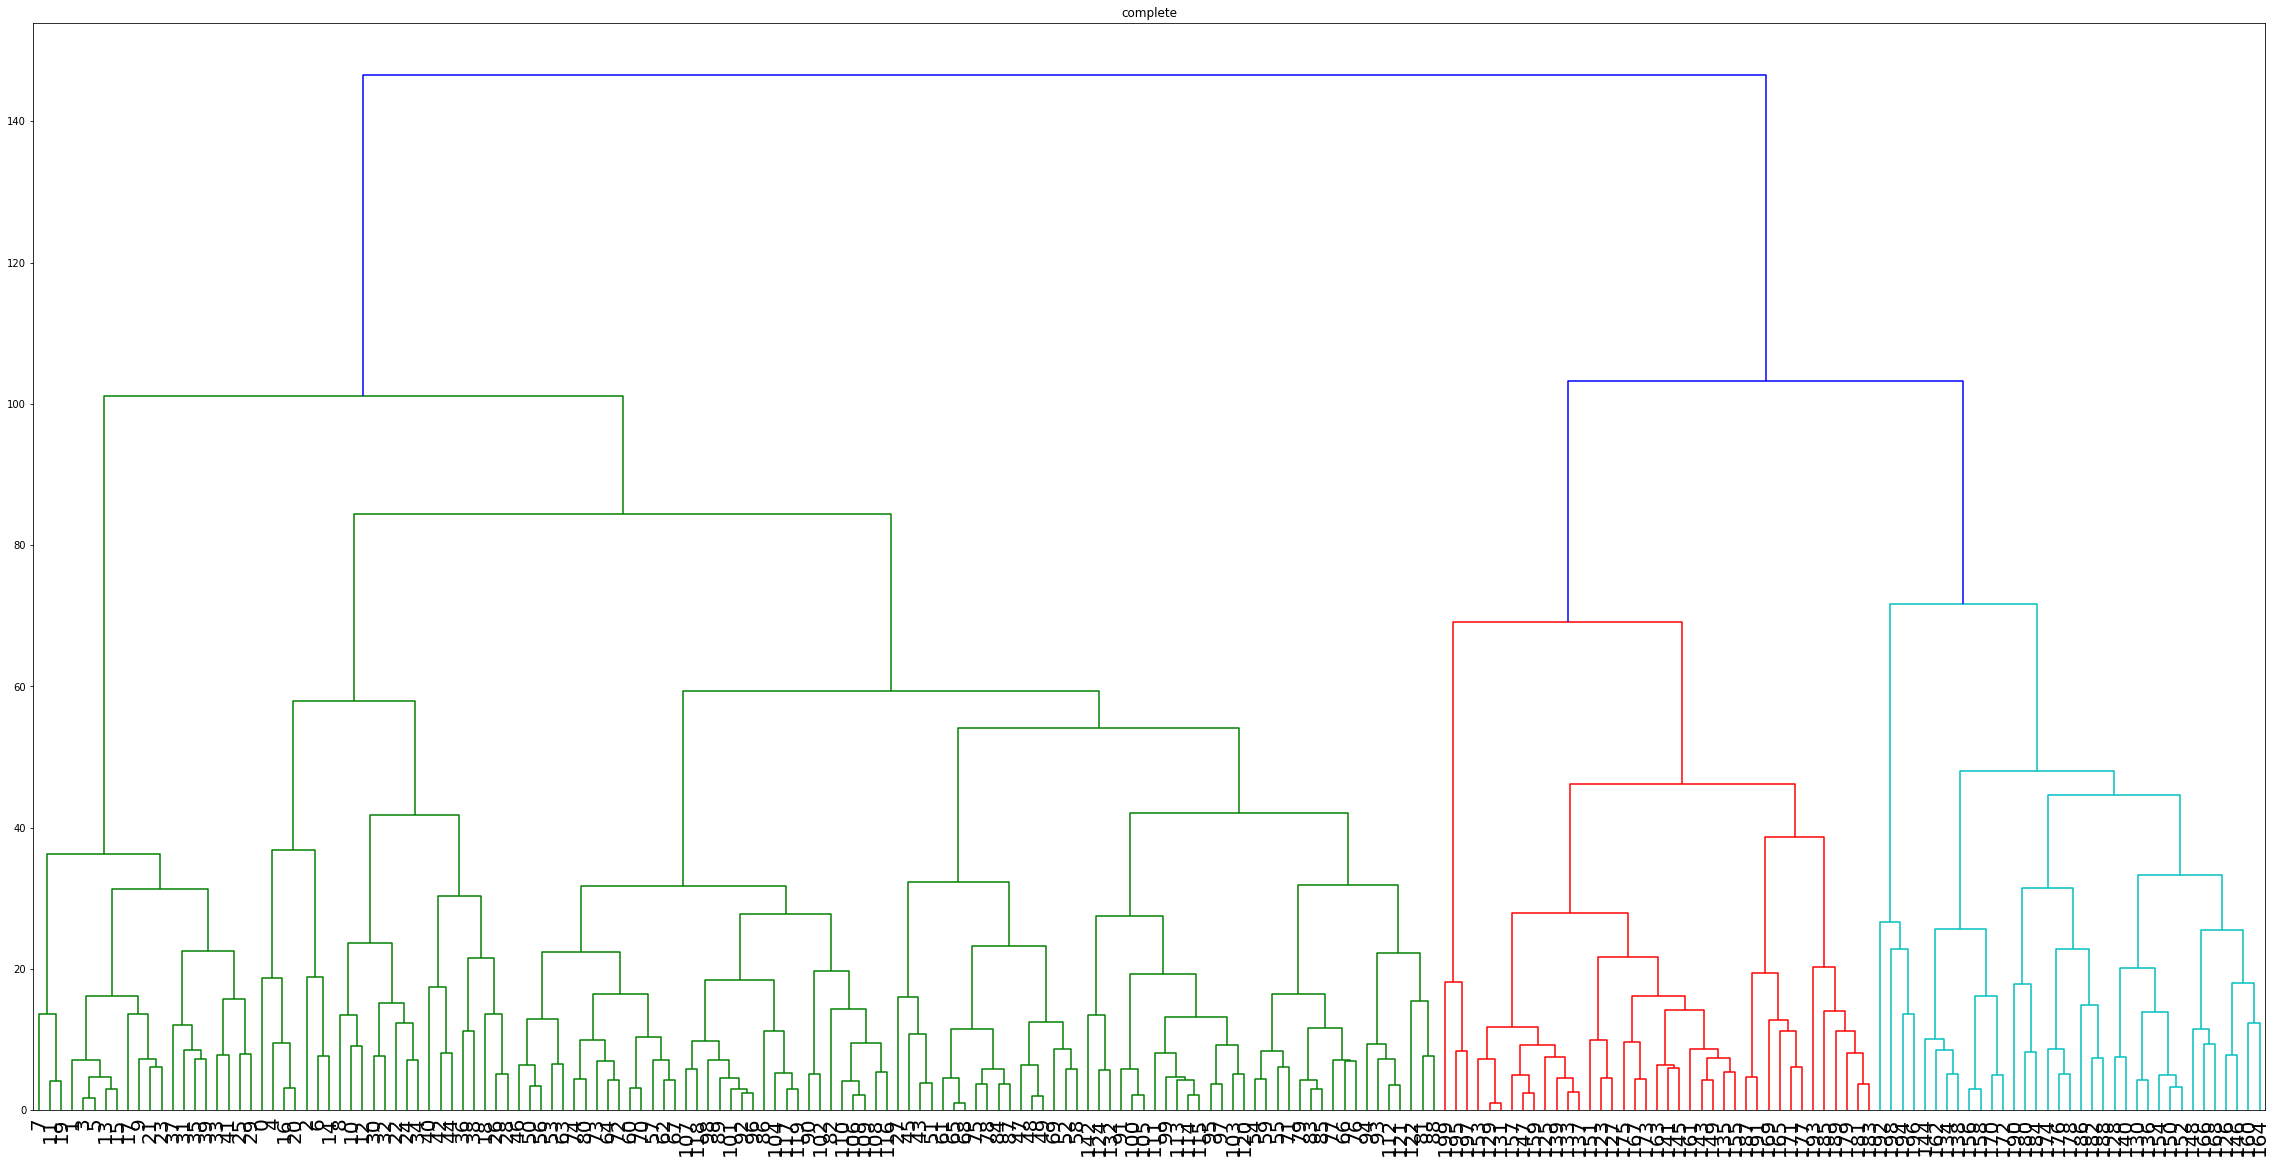

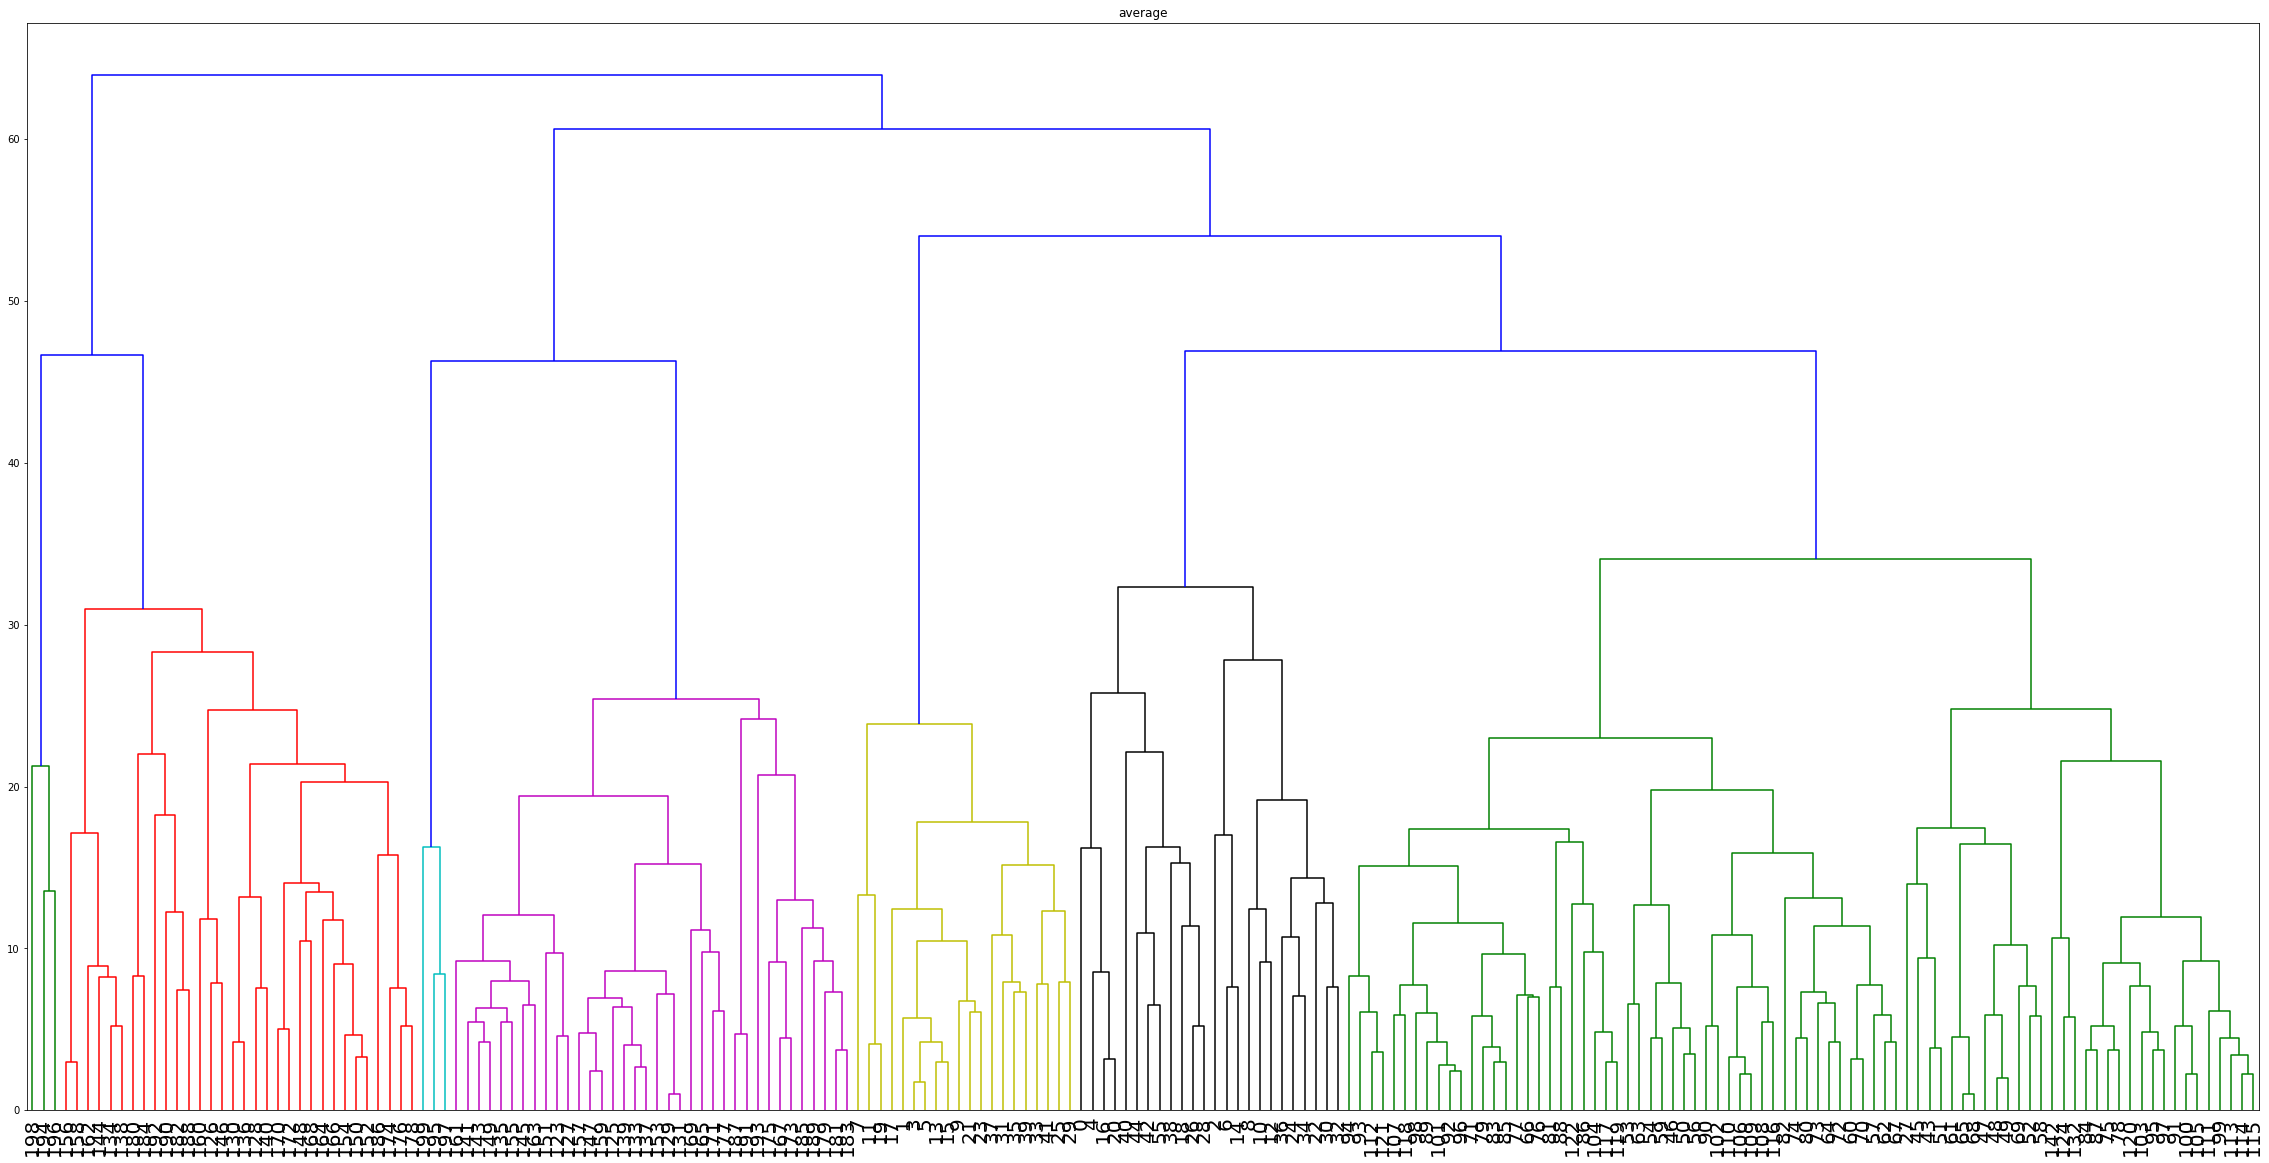

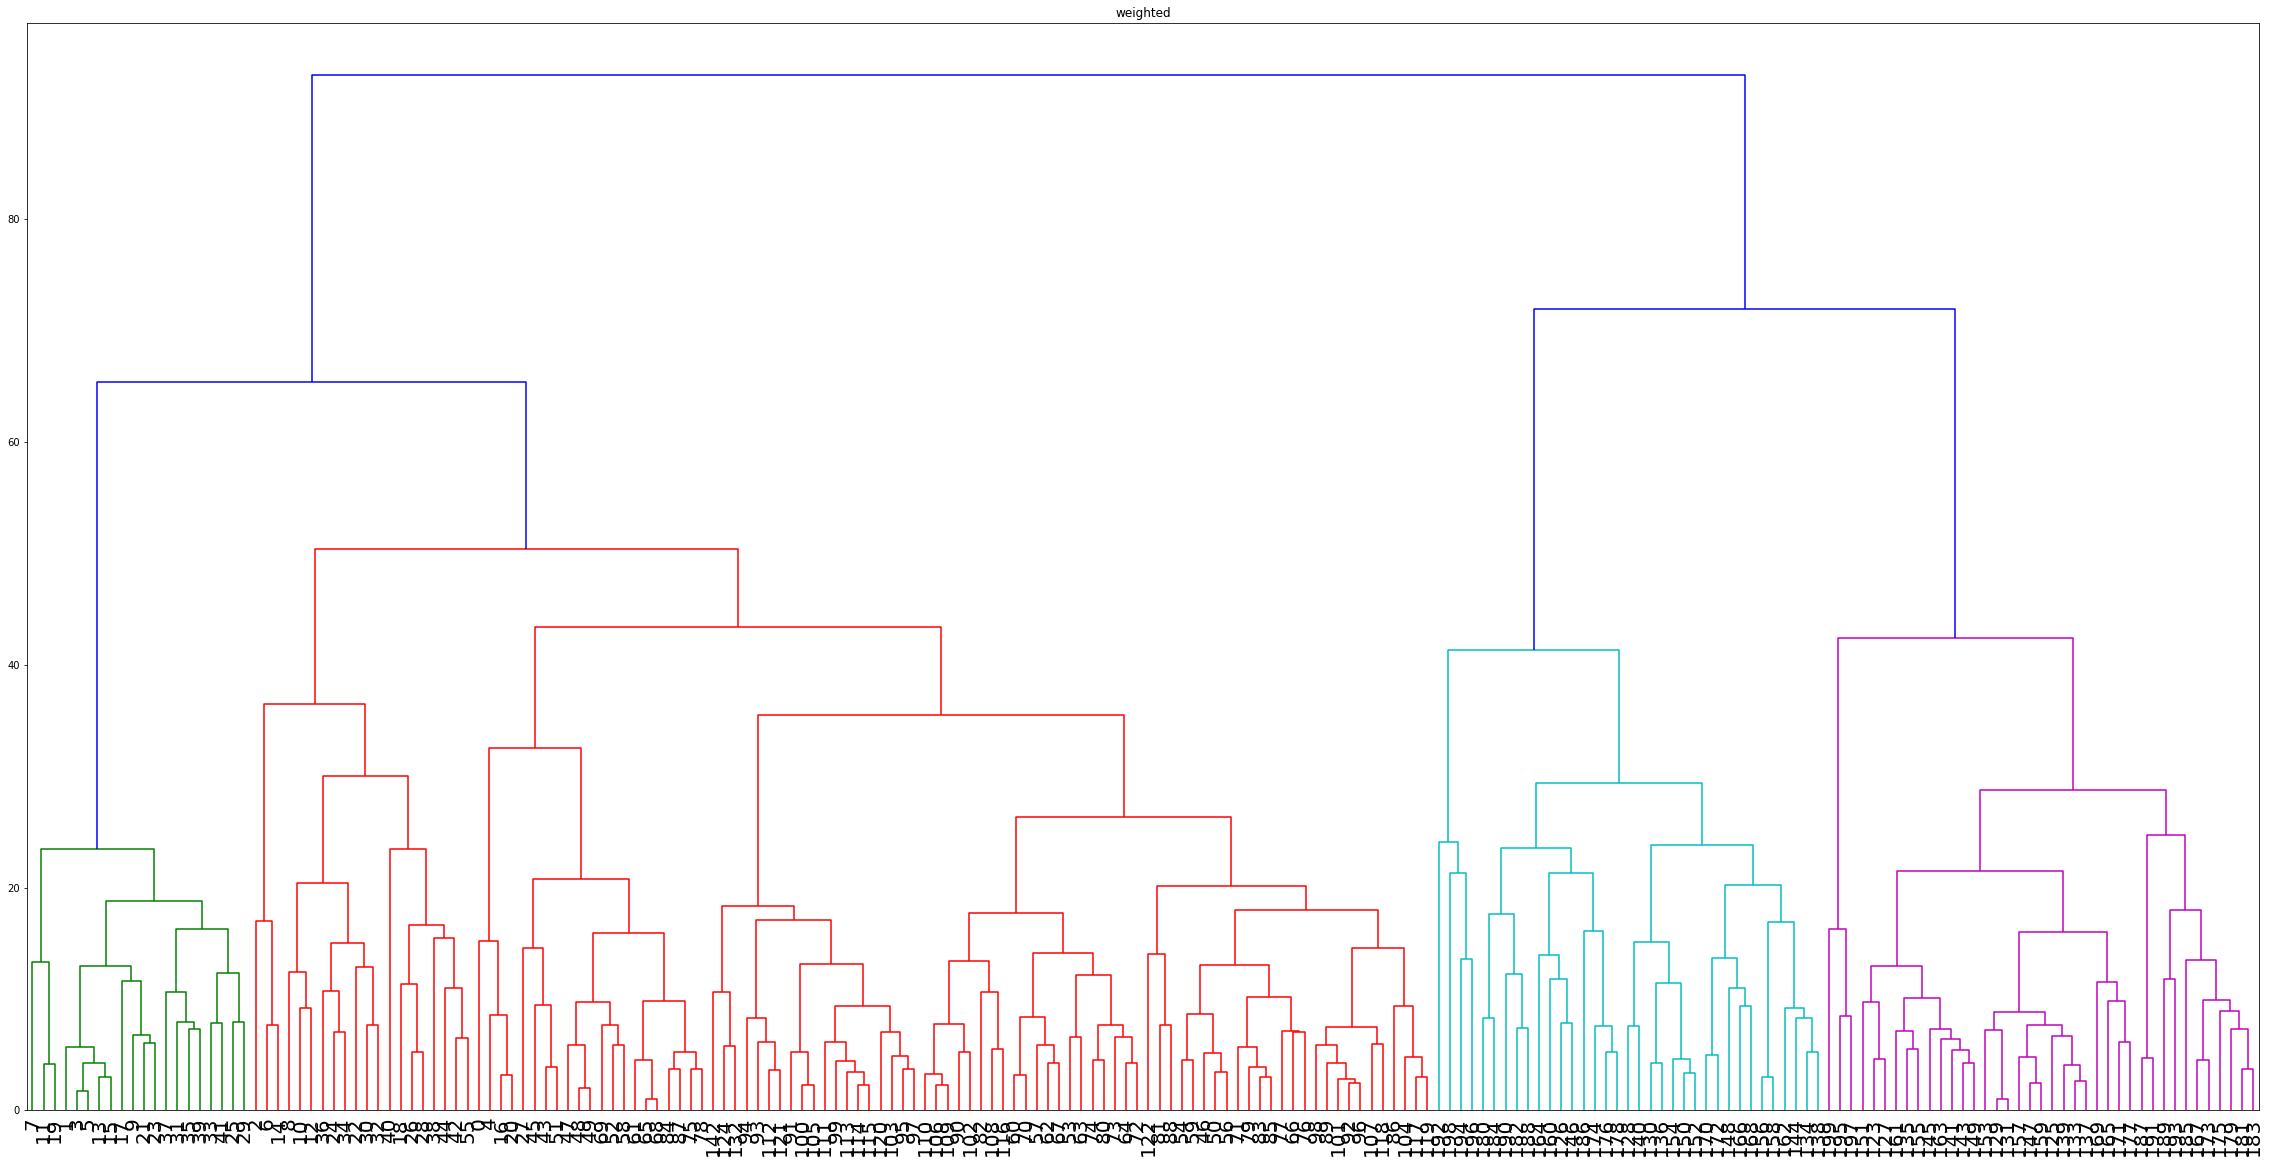

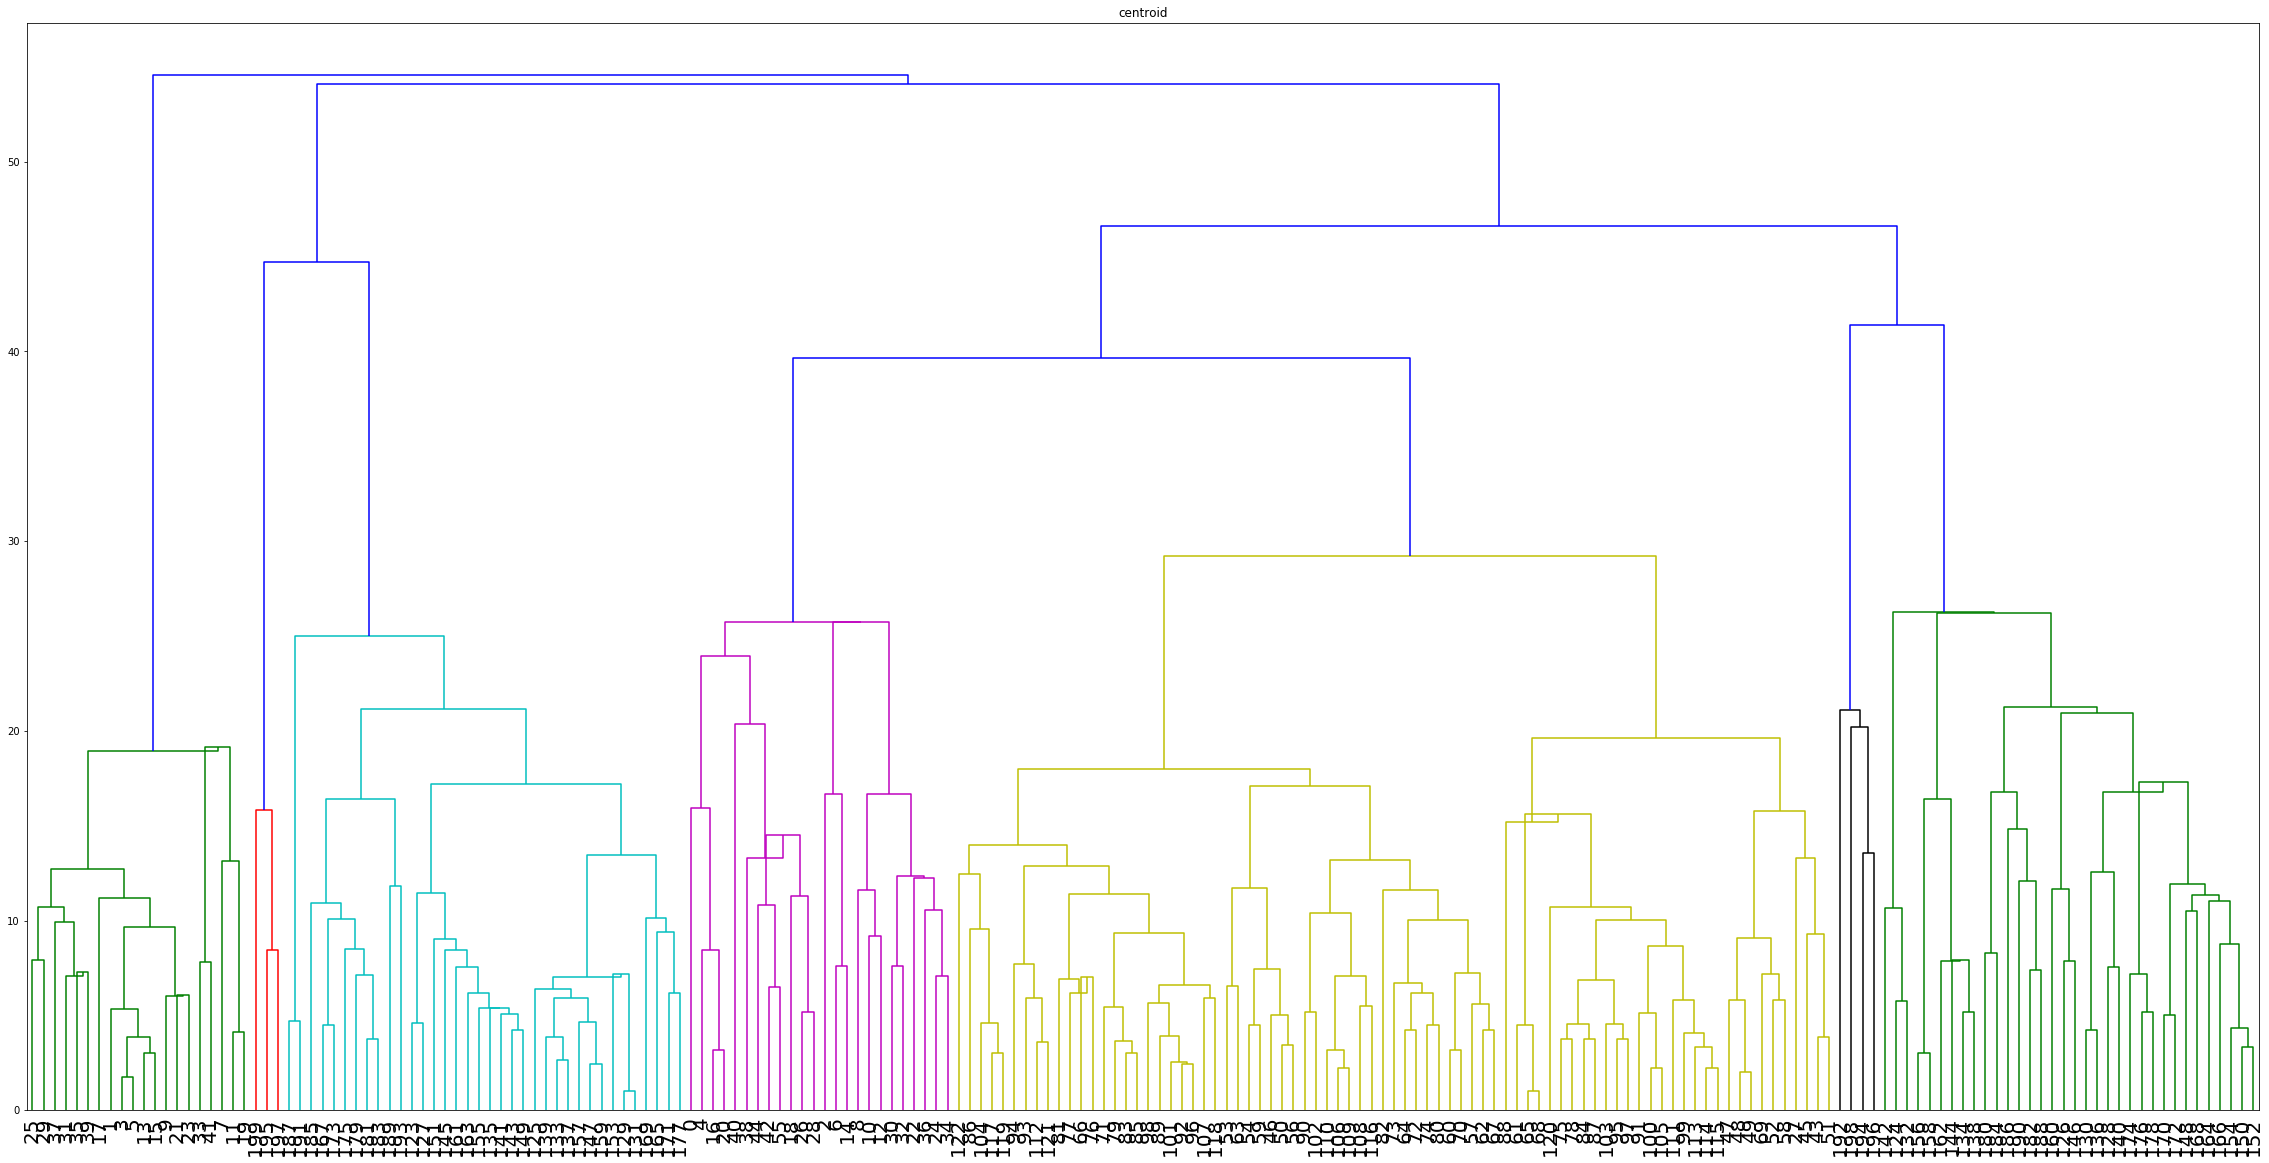

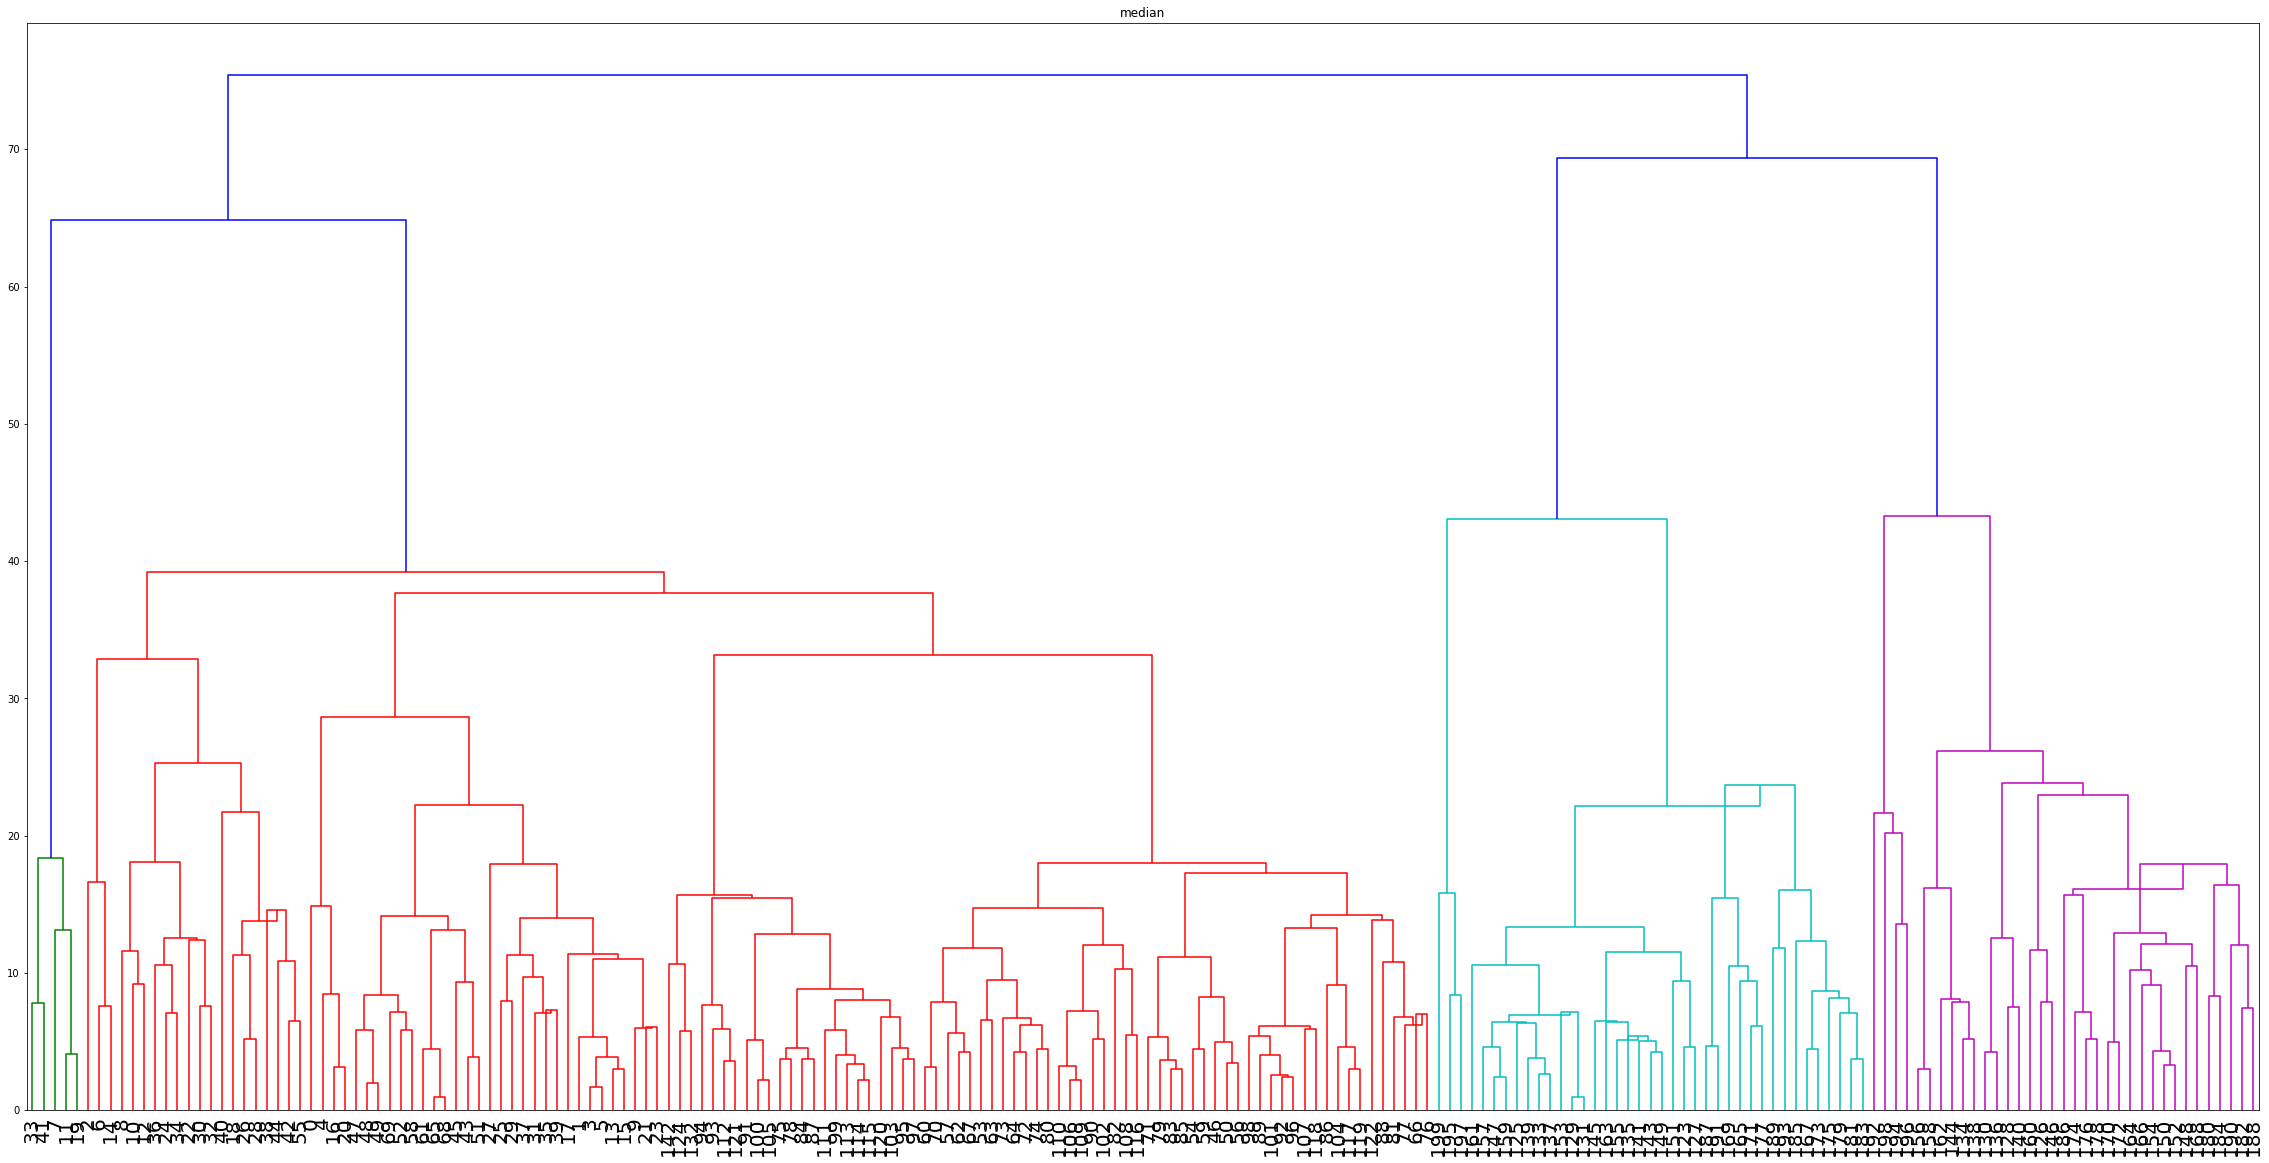

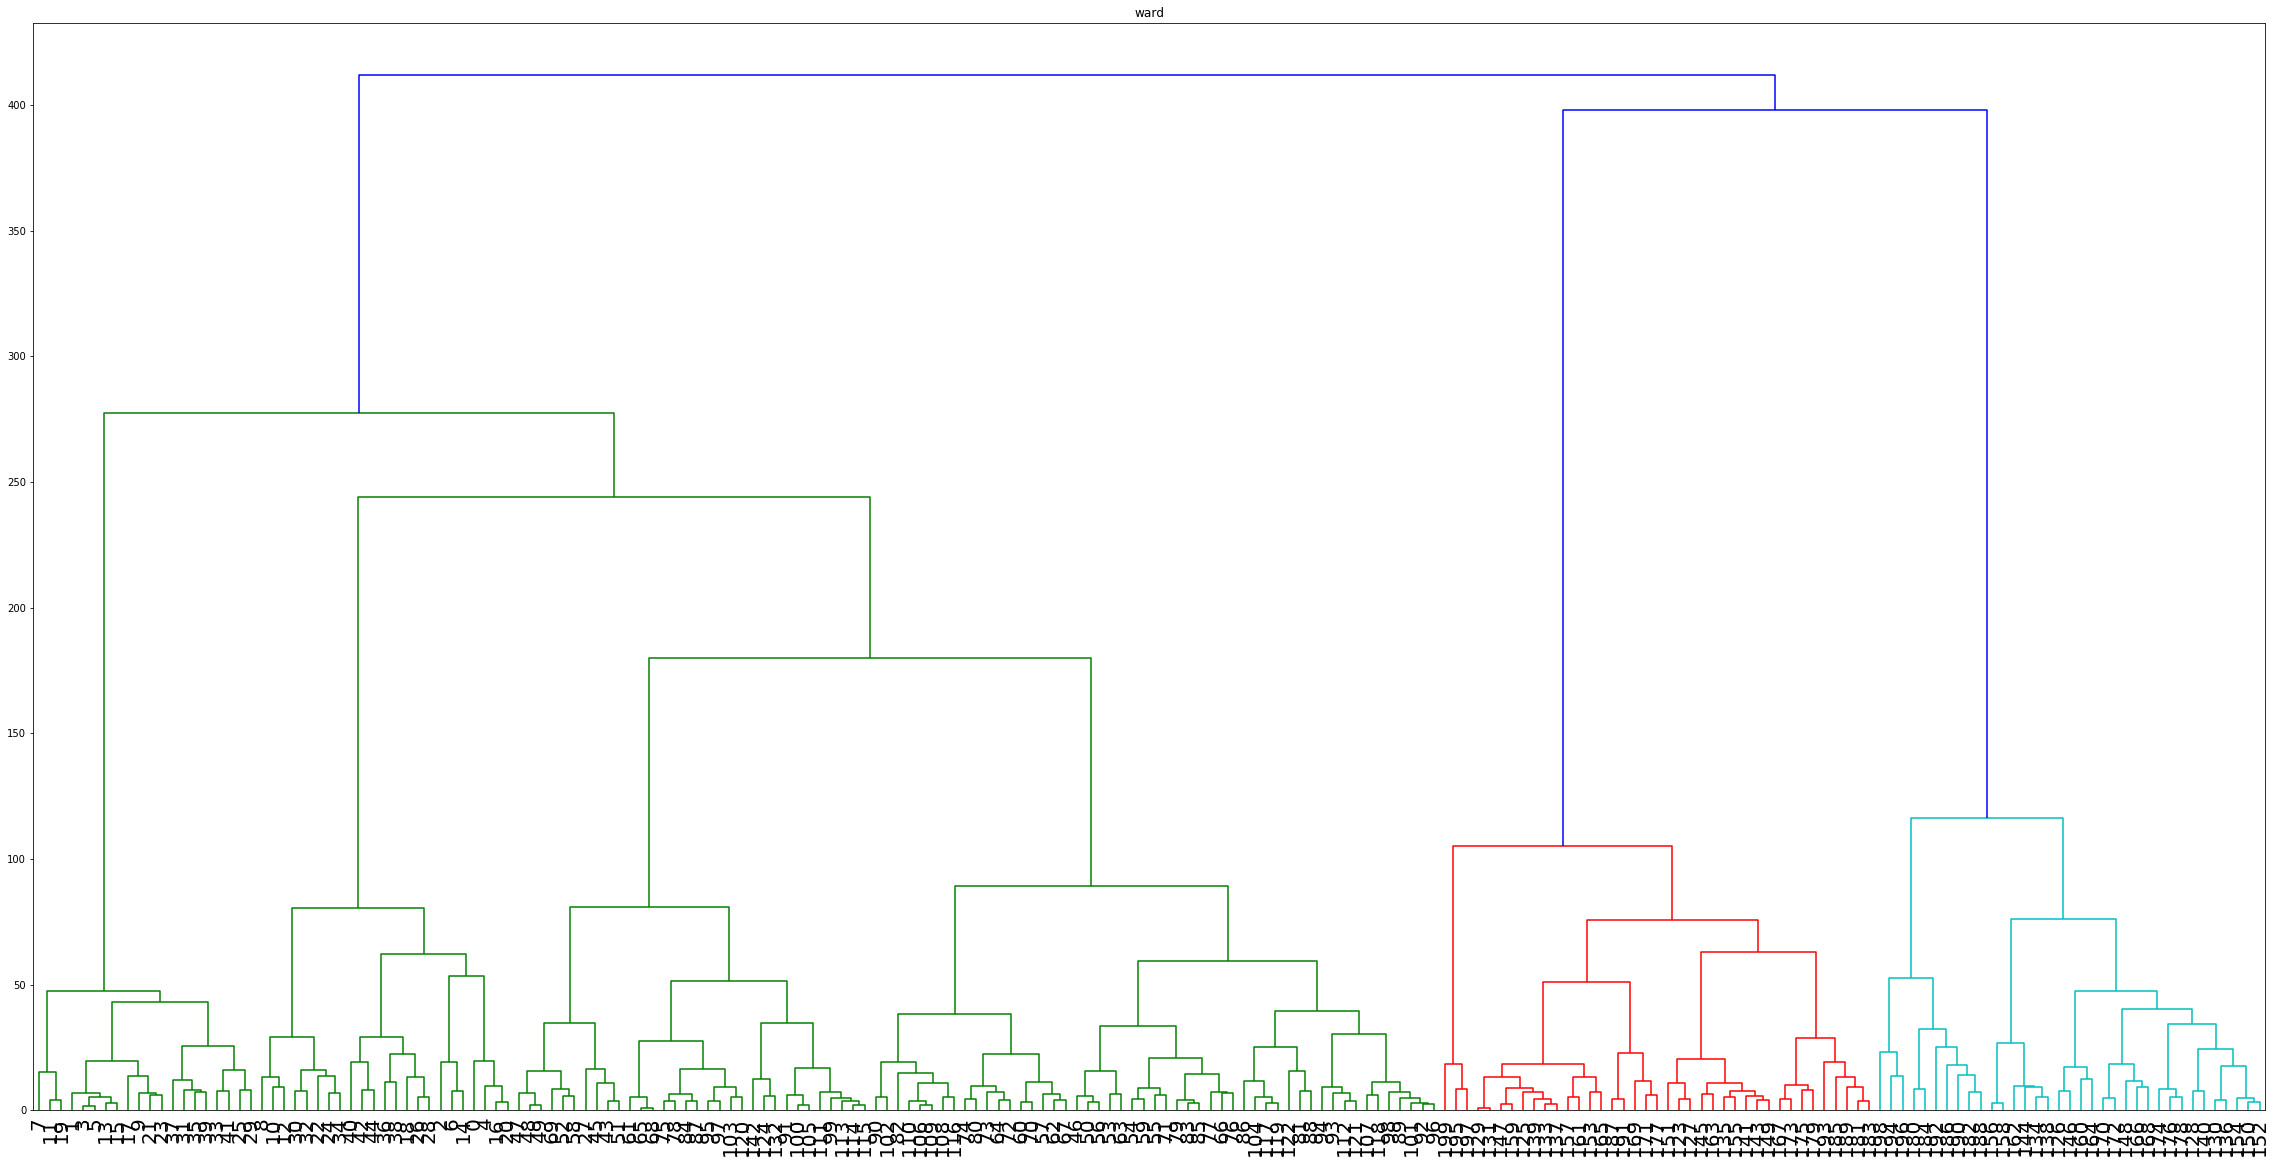

In [13]:
#label설정 안한 경우
for i in method:
    mergings = linkage(data, method= i)

    # Plot the dendrogram, using varieties as labels
    plt.figure(figsize=(40,20))
    dendrogram(mergings,
               leaf_rotation=90,
               leaf_font_size=20,)
    plt.title(i)
    plt.show()


이 data의 경우 2개의 군집(Male:0 Female:1)으로 나누기에는 weighted방식이 적합하다.
군집이 나누어 지는 경계의 차이가 weighted가 크다.

In [14]:
mergings = linkage(data, method= 'weighted')

## Evaluate model with Cross tabulation

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [15]:
from scipy.cluster.hierarchy import fcluster

# fcluster(linkage함수, 클러스터링을 멈추도록하는 임계값, 거리를 기준으로)
# 위의 덴드로그램에서 클러스터간의 거리가 3인 지점에서 자르면 3개의 cluster가 형성됨을 알 수 있다.
# 따라서 임계값을 3으로 정한다.
predict = pd.DataFrame(fcluster(mergings,80,criterion='distance'))
predict.columns=['predict'] # predict column에 예측 결과

# 예측값과 라벨값 비교하기
ct = pd.crosstab(predict['predict'],labels['Gender'])
print(ct)

Gender    0   1
predict        
1        50  76
2        38  36


정확도가 매우 떨어진다. 2개의 군집(Male:Female)으로 나누는 것은 적합하지 않다는 것을 알 수 있다.



## 2차원으로 확인
Annual Income과 Spending Score (1-100)의 pairplot에서 5개로 군집을 나눌 수 있을것이라고 예상했다.
Annual Income과 Spending Score (1-100)의 산점도를 통해 군집이 나누어 지는지 확인하겠다.

평가지표 :
Silhouette 
Calinski-Harabasz 
Davies-Bouldin Index
https://scikit-learn.org/stable/modules/clustering.html

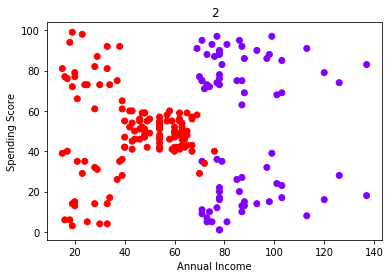

Silhouette Coefficient:  0.29916602844367
Calinski-Harabasz Index:  74.98270740092723
Davies-Bouldin Index:  1.5161980282035796


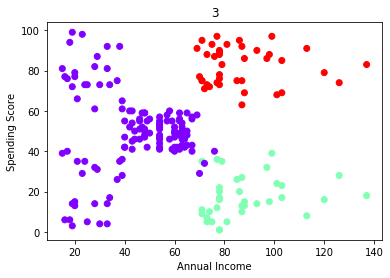

Silhouette Coefficient:  0.3812859576468096
Calinski-Harabasz Index:  111.42566459233312
Davies-Bouldin Index:  0.8605525527236662


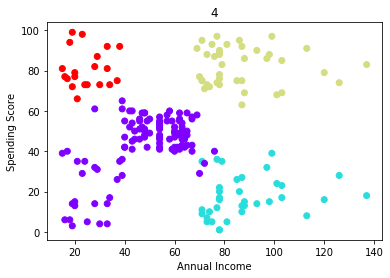

Silhouette Coefficient:  0.4102091359195185
Calinski-Harabasz Index:  124.24582952705217
Davies-Bouldin Index:  0.8333122494122869


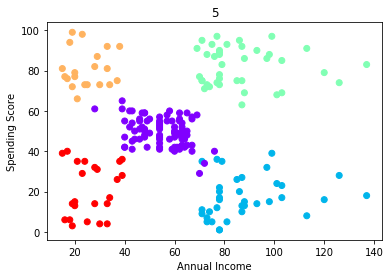

Silhouette Coefficient:  0.43997527212476695
Calinski-Harabasz Index:  147.5797229271367
Davies-Bouldin Index:  0.8220436090843706


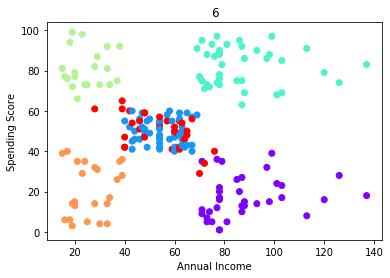

Silhouette Coefficient:  0.4428008535928764
Calinski-Harabasz Index:  159.3286285014588
Davies-Bouldin Index:  0.769039273231496


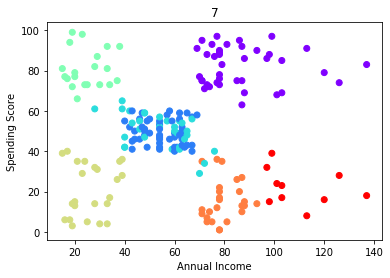

Silhouette Coefficient:  0.42593881050851595
Calinski-Harabasz Index:  152.80206086893278
Davies-Bouldin Index:  0.8522600406268054


In [16]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
 
n = np.arange(2,8,1)
si = []
ch = []
db = []
for i in n:
    Agg = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward').fit(feature)
    labels = Agg.labels_
    plt.scatter(x = feature['Annual Income (k$)'],y = feature['Spending Score (1-100)'], c=labels, cmap='rainbow')
    
    
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.title(i)
    plt.show()
    
    si = np.append(si,metrics.silhouette_score(data, labels, metric='euclidean'))
    ch = np.append(ch,metrics.calinski_harabasz_score(data, labels))
    db = np.append(db,metrics.davies_bouldin_score(data, labels))
    
    print('Silhouette Coefficient: ', metrics.silhouette_score(data, labels, metric='euclidean'))
    print('Calinski-Harabasz Index: ', metrics.calinski_harabasz_score(data, labels))
    print('Davies-Bouldin Index: ', metrics.davies_bouldin_score(data, labels))
    

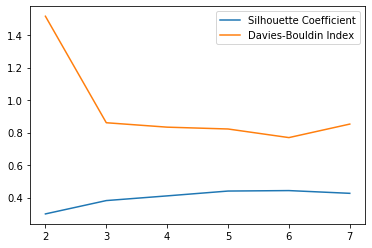

In [17]:
plt.plot(n, si, label="Silhouette Coefficient")
plt.plot(n, db, label="Davies-Bouldin Index")
plt.legend()

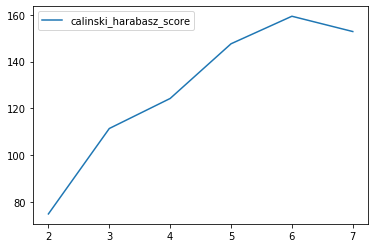

In [18]:
plt.plot(n, ch, label="calinski_harabasz_score")
plt.legend()

best parameter : n_clusters = 5

# 2. K-means Clustering

## 3차원으로 확인

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = KMeans(n_clusters=2,algorithm='auto') #target class에 맞게 cluster를 2개로 설정
model.fit(feature)

predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

In [20]:
r.head()

,Age,Annual Income (k$),Spending Score (1-100),predict
0,19,15,39,1
1,21,15,81,0
2,20,16,6,1
3,23,16,77,0
4,31,17,40,1


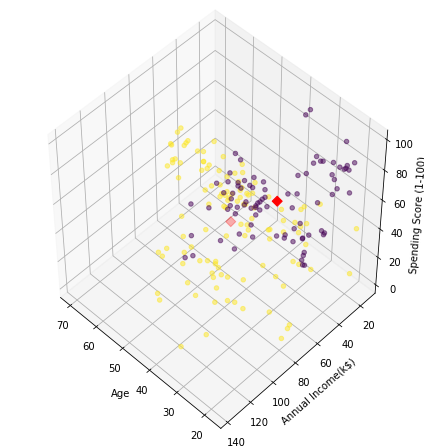

In [21]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Age','Annual Income (k$)','Spending Score (1-100)'])
center_x = centers['Age']
center_y = centers['Annual Income (k$)']
center_z = centers['Spending Score (1-100)']

from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Age'],r['Annual Income (k$)'],r['Spending Score (1-100)'],c=r['predict'],alpha=0.5)
ax.scatter(center_x,center_y,center_z,s=50,marker='D',c='r')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income(k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [22]:
ct = pd.crosstab(data['Gender'],r['predict'])
print (ct)
print (model.inertia_)

predict   0   1
Gender         
0        38  50
1        47  65
212840.16982097185


### n_clusters = 5

In [23]:
# create model and prediction
model = KMeans(n_clusters=5,algorithm='auto') #target class에 맞게 cluster를 2개로 설정
model.fit(feature)

predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

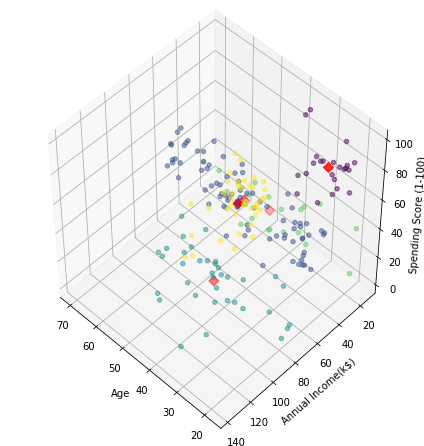

In [24]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Age','Annual Income (k$)','Spending Score (1-100)'])
center_x = centers['Age']
center_y = centers['Annual Income (k$)']
center_z = centers['Spending Score (1-100)']

from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Age'],r['Annual Income (k$)'],r['Spending Score (1-100)'],c=r['predict'],alpha=0.5)
ax.scatter(center_x,center_y,center_z,s=50,marker='D',c='r')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income(k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

cluster의 개수를 5로 변경해 보았을 때, 조금 더 군집이 잘 나뉜것을 확인할 수 있다.

## 2차원으로 확인

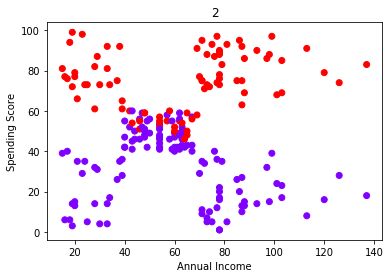

Silhouette Coefficient:  0.29307334005502633
Calinski-Harabasz Index:  89.26031302776754
Davies-Bouldin Index:  1.357320466329861


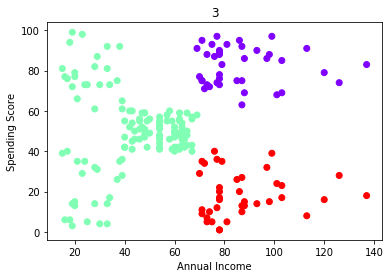

Silhouette Coefficient:  0.383798873822341
Calinski-Harabasz Index:  113.66664386810282
Davies-Bouldin Index:  0.8750649004456997


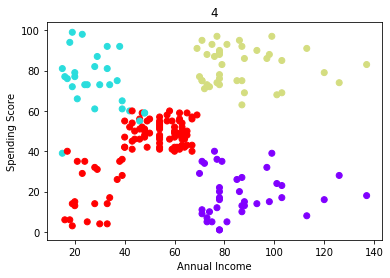

Silhouette Coefficient:  0.4052954330641215
Calinski-Harabasz Index:  127.92482557839757
Davies-Bouldin Index:  0.8918193554892452


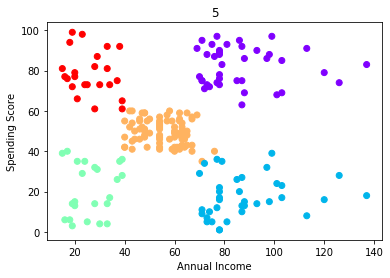

Silhouette Coefficient:  0.4440669204743007
Calinski-Harabasz Index:  150.94631598679595
Davies-Bouldin Index:  0.8222596417814184


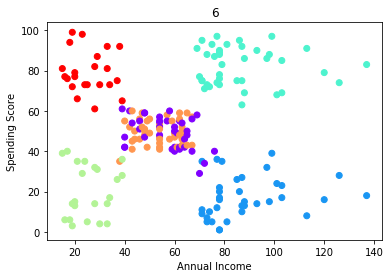

Silhouette Coefficient:  0.45206493204632353
Calinski-Harabasz Index:  166.57640977280286
Davies-Bouldin Index:  0.7448567425361445


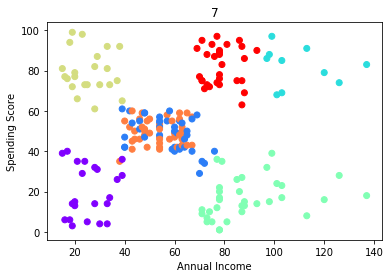

Silhouette Coefficient:  0.4400035911705477
Calinski-Harabasz Index:  162.07853962238548
Davies-Bouldin Index:  0.7942861045551696


In [28]:
n = np.arange(2,8,1)
si = []
ch = []
db = []
for i in n:
    kmeans = KMeans(n_clusters=i).fit(feature)    
    labels = kmeans.labels_
    plt.scatter(feature['Annual Income (k$)'],feature['Spending Score (1-100)'], c=labels, cmap='rainbow')
    
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.title(i)
    plt.show()
    
    si = np.append(si,metrics.silhouette_score(data, labels, metric='euclidean'))
    ch = np.append(ch,metrics.calinski_harabasz_score(data, labels))
    db = np.append(db,metrics.davies_bouldin_score(data, labels))
    
    print('Silhouette Coefficient: ', metrics.silhouette_score(data, labels, metric='euclidean'))
    print('Calinski-Harabasz Index: ', metrics.calinski_harabasz_score(data, labels))
    print('Davies-Bouldin Index: ', metrics.davies_bouldin_score(data, labels))
    

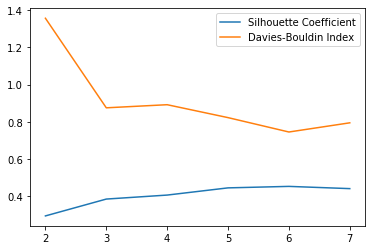

In [29]:
plt.plot(n, si, label="Silhouette Coefficient")
plt.plot(n, db, label="Davies-Bouldin Index")
plt.legend()

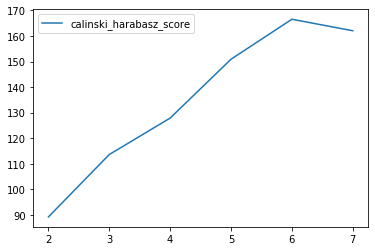

In [30]:
plt.plot(n, ch, label="calinski_harabasz_score")
plt.legend()

best parameter : n_clusters = 5

## 최적의 군집 수 K 결정 (Elbow Point)

5


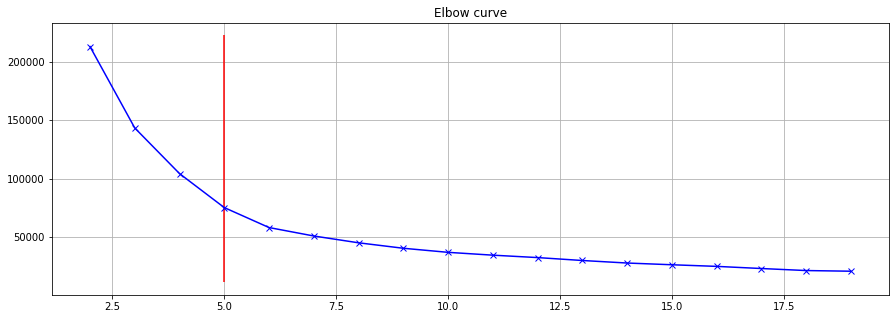

In [31]:
X = feature
distorsions = []

# 군집 수 K의 변화에 따라
# Inertia Value: 군집화가 된 후에, 각 중심점에서 군집내의 데이터간의 거리를 합산한 것
# 즉, 군집의 응집도를 나타내는 값
# 이 값을 구해 그래프로 그린다!
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

#elbow point 찾기
x = range(1,len(distorsions)+1)    
from kneed import KneeLocator
kn = KneeLocator(x, distorsions, curve='convex', direction='decreasing')
print(kn.knee)


fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions,'bx-')
plt.grid(True)
plt.title('Elbow curve')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='solid',color = 'r')

# 급격하게 하강하다가 변화의 폭이 크지 않는 지점 Elbow Point를 찾는다.

KneeLocator을 이용하여 elbow point = 5를 찾았다.
최적의 군집 수가 5(K=5)라는 것을 알 수 있다.

# 3. DBSCAN

In [32]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=6.5,min_samples=6)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

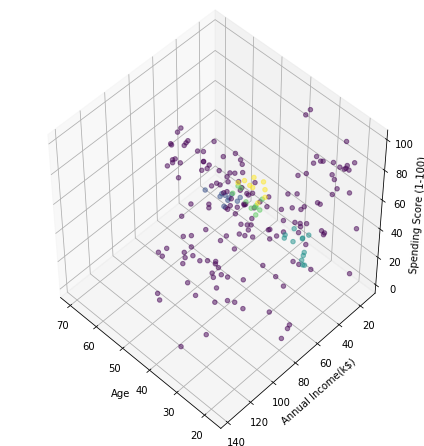

In [33]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Age'],r['Annual Income (k$)'],r['Spending Score (1-100)'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income(k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

cluster가 5개가 되도록 eps를 조절하였다.
3차원으로 군집이 잘 나뉘어져있는지 확인이 힘들다 .
2차원으로 확인하자

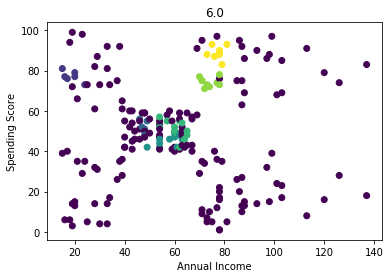

Silhouette Coefficient:  -0.19883629640741898
Calinski-Harabasz Index:  6.414913899134238
Davies-Bouldin Index:  2.2661318064015483


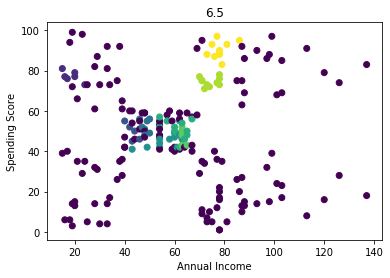

Silhouette Coefficient:  -0.12992995816549424
Calinski-Harabasz Index:  6.491523553026698
Davies-Bouldin Index:  2.0557680892721404


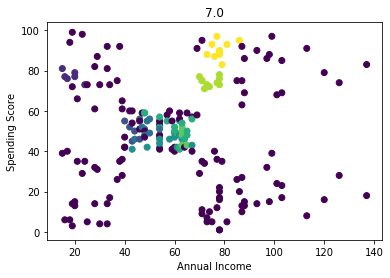

Silhouette Coefficient:  -0.09954810959749155
Calinski-Harabasz Index:  6.9160887265694475
Davies-Bouldin Index:  2.0929603687403966


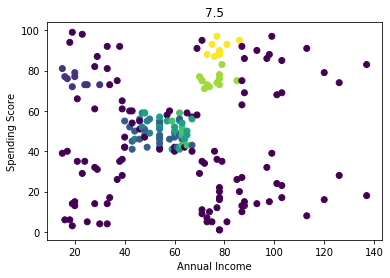

Silhouette Coefficient:  -0.02292753649997432
Calinski-Harabasz Index:  9.664600026673352
Davies-Bouldin Index:  1.947392232137061


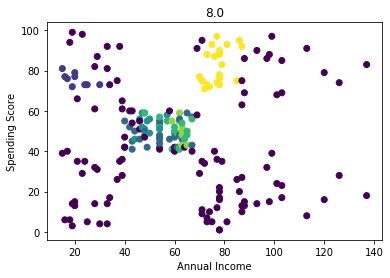

Silhouette Coefficient:  0.012735596993838732
Calinski-Harabasz Index:  11.761801134455125
Davies-Bouldin Index:  2.0817496508166546


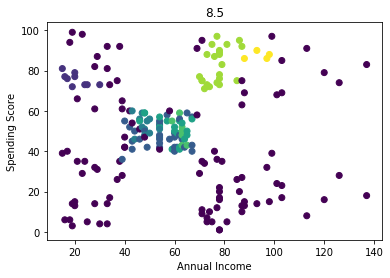

Silhouette Coefficient:  0.012380962782405951
Calinski-Harabasz Index:  12.515829531809576
Davies-Bouldin Index:  2.0091025527479154


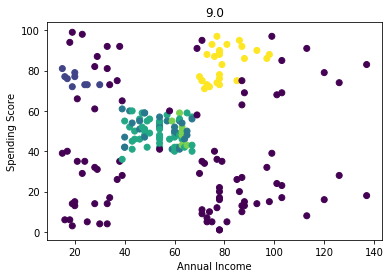

Silhouette Coefficient:  0.07660613388790788
Calinski-Harabasz Index:  17.537993450045448
Davies-Bouldin Index:  1.97374804158072


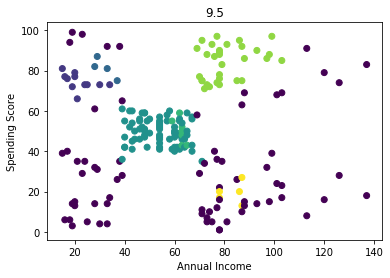

Silhouette Coefficient:  0.017986602618341615
Calinski-Harabasz Index:  21.02278151938372
Davies-Bouldin Index:  1.866954756671315


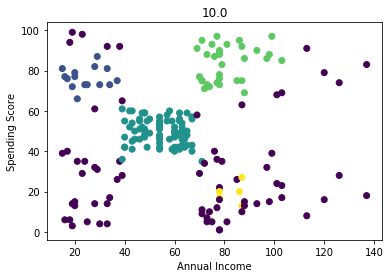

Silhouette Coefficient:  0.1519693794908318
Calinski-Harabasz Index:  30.49987040338604
Davies-Bouldin Index:  2.030223087997819


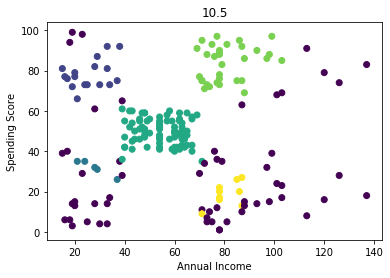

Silhouette Coefficient:  0.14761494214200213
Calinski-Harabasz Index:  30.969024031776453
Davies-Bouldin Index:  1.9703380954126055


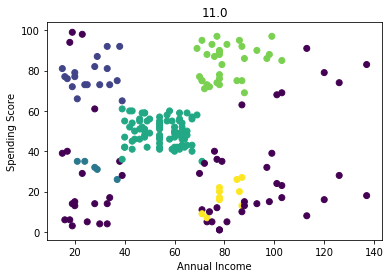

Silhouette Coefficient:  0.15950489369586132
Calinski-Harabasz Index:  31.943031546200146
Davies-Bouldin Index:  1.99345385420878


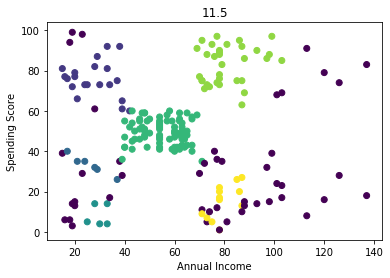

Silhouette Coefficient:  0.211347465425132
Calinski-Harabasz Index:  32.84452748402696
Davies-Bouldin Index:  1.7843371176182181


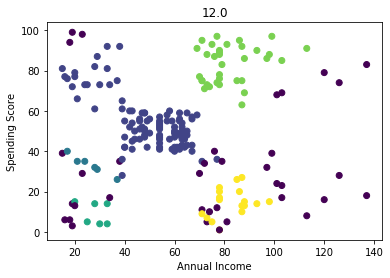

Silhouette Coefficient:  0.1757505994935451
Calinski-Harabasz Index:  32.2643628012534
Davies-Bouldin Index:  1.785749368386142


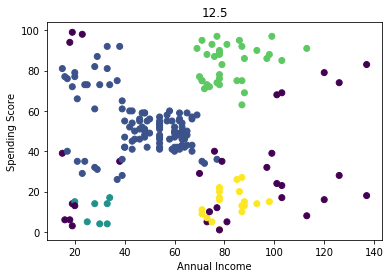

Silhouette Coefficient:  0.23399185336572167
Calinski-Harabasz Index:  39.08715436649626
Davies-Bouldin Index:  1.9085517747312093


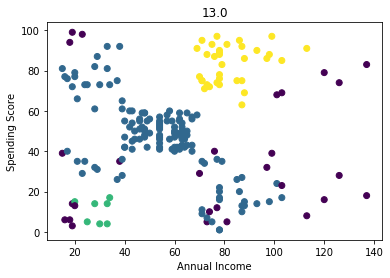

Silhouette Coefficient:  0.19456187371454448
Calinski-Harabasz Index:  26.998004347954492
Davies-Bouldin Index:  2.427412764214976


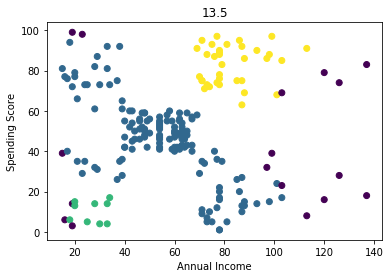

Silhouette Coefficient:  0.22404113514385438
Calinski-Harabasz Index:  30.244270806134775
Davies-Bouldin Index:  2.2188220735644815


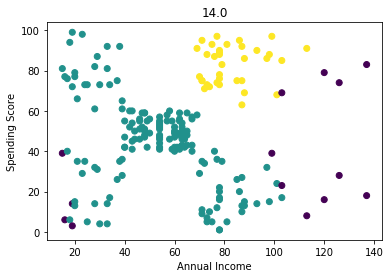

Silhouette Coefficient:  0.2694965016215346
Calinski-Harabasz Index:  37.651484635568266
Davies-Bouldin Index:  1.9040470093991189


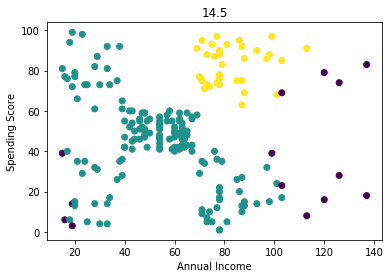

Silhouette Coefficient:  0.2694965016215346
Calinski-Harabasz Index:  37.651484635568266
Davies-Bouldin Index:  1.9040470093991189


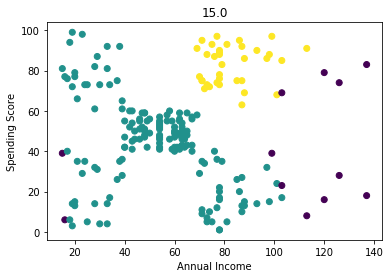

Silhouette Coefficient:  0.2759874119474522
Calinski-Harabasz Index:  43.43328619652356
Davies-Bouldin Index:  1.3978593318251955


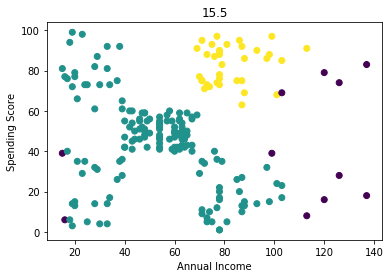

Silhouette Coefficient:  0.2768500548102227
Calinski-Harabasz Index:  41.67573276401467
Davies-Bouldin Index:  1.4741361731630243


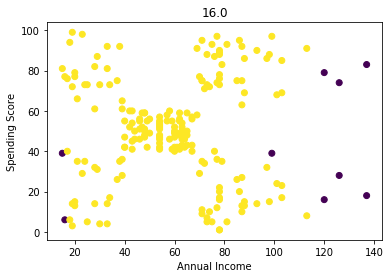

Silhouette Coefficient:  0.32699543619307336
Calinski-Harabasz Index:  10.229357480794693
Davies-Bouldin Index:  1.967772468450248


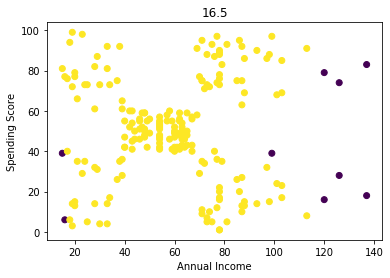

Silhouette Coefficient:  0.32699543619307336
Calinski-Harabasz Index:  10.229357480794693
Davies-Bouldin Index:  1.967772468450248


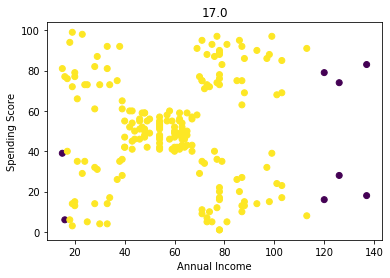

Silhouette Coefficient:  0.3496282135522545
Calinski-Harabasz Index:  9.050236638967219
Davies-Bouldin Index:  2.0936796113111056


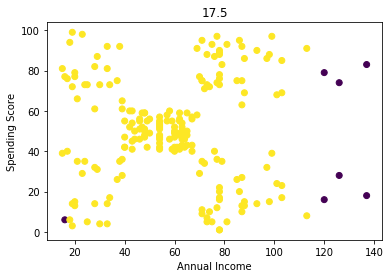

Silhouette Coefficient:  0.3659558333779648
Calinski-Harabasz Index:  13.311086591801924
Davies-Bouldin Index:  1.4670799391432459


In [93]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
n = np.arange(6, 18,0.5)
#eps를 변경하며 최적의 parameter를 찾자

si = []
ch = []
db = []

for i in n:
    db = DBSCAN(eps=i, min_samples=5).fit(feature)
    cluster = db.fit_predict(feature)
    labels = db.labels_
    plt.scatter(x = feature['Annual Income (k$)'],y = feature['Spending Score (1-100)'], c=cluster)
    
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.title(i)
    plt.show()


    si = np.append(si,metrics.silhouette_score(data, labels, metric='euclidean'))
    ch = np.append(ch,metrics.calinski_harabasz_score(data, labels))
    db = np.append(db,metrics.davies_bouldin_score(data, labels))
    
    print('Silhouette Coefficient: ', metrics.silhouette_score(data, labels, metric='euclidean'))
    print('Calinski-Harabasz Index: ', metrics.calinski_harabasz_score(data, labels))
    print('Davies-Bouldin Index: ', metrics.davies_bouldin_score(data, labels))
    

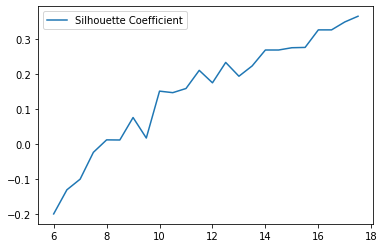

In [94]:
plt.plot(n, si, label="Silhouette Coefficient")
#plt.plot(n, db, label="Davies-Bouldin Index")
plt.legend()

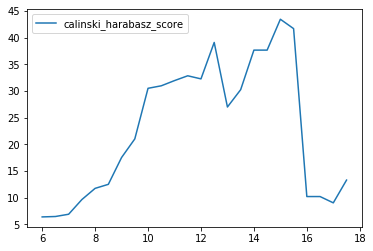

In [95]:
plt.plot(n, ch, label="calinski_harabasz_score")
plt.legend()

# 4. Mean Shift

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

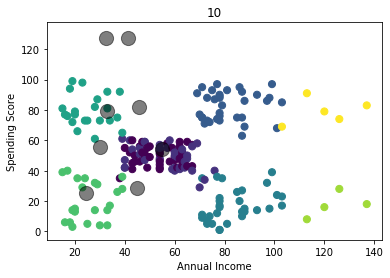

Silhouette Coefficient:  0.43812182781999326
Calinski-Harabasz Index:  156.14851781219883
Davies-Bouldin Index:  0.7372444064730994


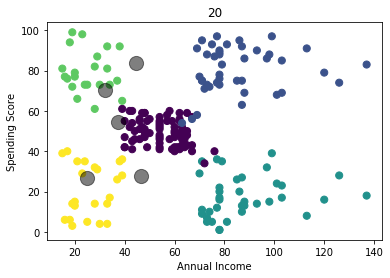

Silhouette Coefficient:  0.4319095754409623
Calinski-Harabasz Index:  145.37692302208555
Davies-Bouldin Index:  0.832227570569767


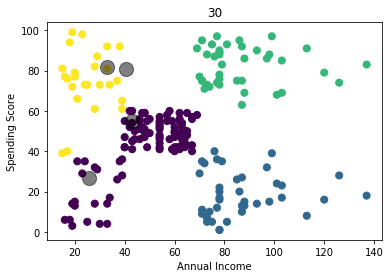

Silhouette Coefficient:  0.4095903458069934
Calinski-Harabasz Index:  126.93303488315821
Davies-Bouldin Index:  0.879675631096941


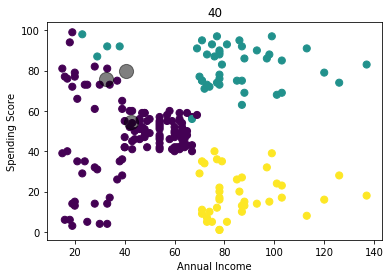

Silhouette Coefficient:  0.37109964198284023
Calinski-Harabasz Index:  109.4493905569606
Davies-Bouldin Index:  0.914786150755464


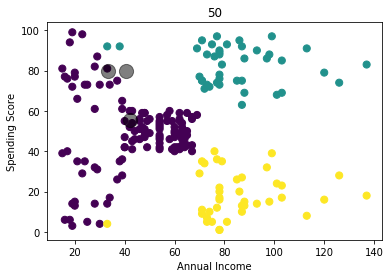

Silhouette Coefficient:  0.37651849606362914
Calinski-Harabasz Index:  111.12017457318615
Davies-Bouldin Index:  0.9062263149331032


In [40]:
from sklearn.cluster import MeanShift, estimate_bandwidth

n = [10,20,30,40,50]
si = []
ch = []
db = []

for i in n:
    bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=i)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
 
    plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'], c=labels, s=50, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, alpha=0.5);
    
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.title(i)
    plt.show()
    
    si = np.append(si,metrics.silhouette_score(data, labels, metric='euclidean'))
    ch = np.append(ch,metrics.calinski_harabasz_score(data, labels))
    db = np.append(db,metrics.davies_bouldin_score(data, labels))
    
    print('Silhouette Coefficient: ', metrics.silhouette_score(data, labels, metric='euclidean'))
    print('Calinski-Harabasz Index: ', metrics.calinski_harabasz_score(data, labels))
    print('Davies-Bouldin Index: ', metrics.davies_bouldin_score(data, labels))
    

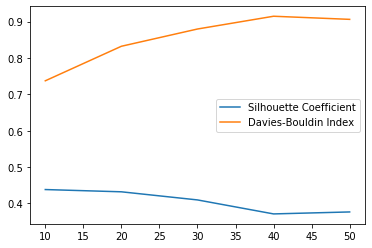

In [41]:
plt.plot(n, si, label="Silhouette Coefficient")
plt.plot(n, db, label="Davies-Bouldin Index")
plt.legend()

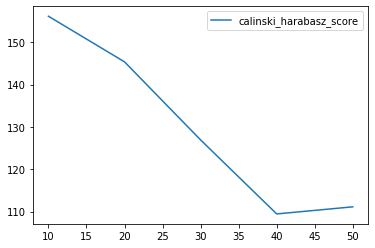

In [42]:
plt.plot(n, ch, label="calinski_harabasz_score")
plt.legend()

best parameter : bandwidth=20

# 5. MiniBatchKMeans

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans

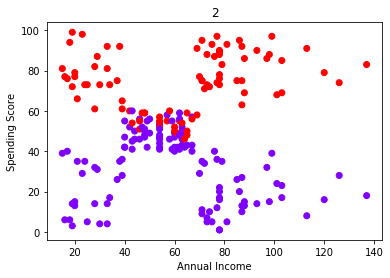

Silhouette Coefficient:  0.29026429747767307
Calinski-Harabasz Index:  89.05126271888314
Davies-Bouldin Index:  1.3619393796424226


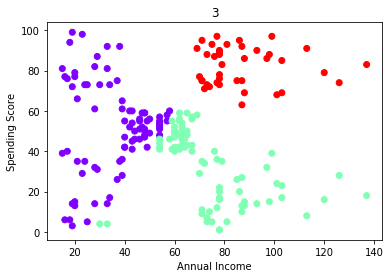

Silhouette Coefficient:  0.31276577674853717
Calinski-Harabasz Index:  97.84466282791823
Davies-Bouldin Index:  1.1591936209984286


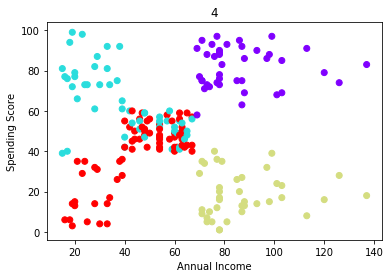

Silhouette Coefficient:  0.39143885799396627
Calinski-Harabasz Index:  126.27797181090509
Davies-Bouldin Index:  1.043082198687517


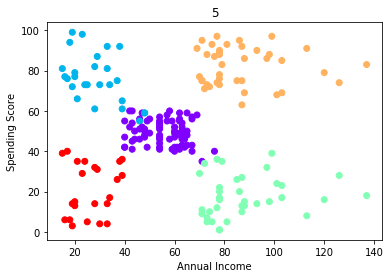

Silhouette Coefficient:  0.4388329573955215
Calinski-Harabasz Index:  150.4300639005467
Davies-Bouldin Index:  0.8289801346626348


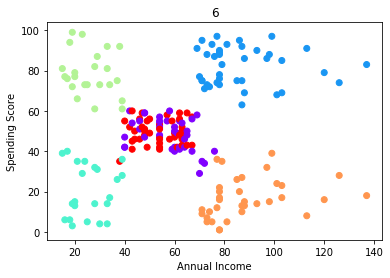

Silhouette Coefficient:  0.4506609653808789
Calinski-Harabasz Index:  166.4478224929569
Davies-Bouldin Index:  0.7520902834855218


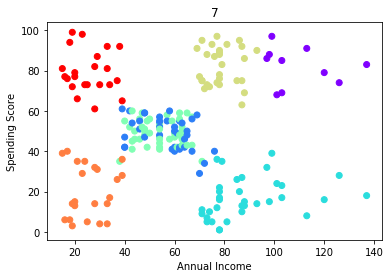

Silhouette Coefficient:  0.43965264046504215
Calinski-Harabasz Index:  161.98616980846137
Davies-Bouldin Index:  0.792126737980222


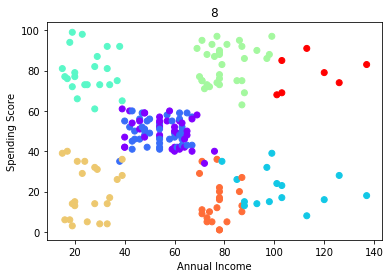

Silhouette Coefficient:  0.4196441278313341
Calinski-Harabasz Index:  158.83500264485514
Davies-Bouldin Index:  0.8918712700628242


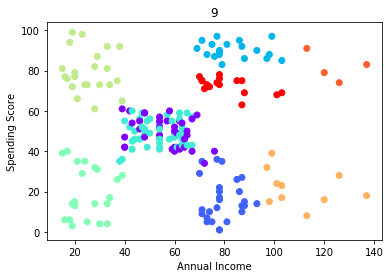

Silhouette Coefficient:  0.40663369726410437
Calinski-Harabasz Index:  149.22726120906657
Davies-Bouldin Index:  0.8876327116391977


In [44]:
from sklearn.cluster import MiniBatchKMeans
n = np.arange(2,10,1)

si = []
ch = []
db = []

for i in n:
    Sc = MiniBatchKMeans(n_clusters=i).fit(feature)    
    labels = Sc.labels_
    plt.scatter(feature['Annual Income (k$)'],feature['Spending Score (1-100)'], c=labels, cmap='rainbow')
    
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.title(i)
    plt.show()
    
    si = np.append(si,metrics.silhouette_score(data, labels, metric='euclidean'))
    ch = np.append(ch,metrics.calinski_harabasz_score(data, labels))
    db = np.append(db,metrics.davies_bouldin_score(data, labels))
    
    print('Silhouette Coefficient: ', metrics.silhouette_score(data, labels, metric='euclidean'))
    print('Calinski-Harabasz Index: ', metrics.calinski_harabasz_score(data, labels))
    print('Davies-Bouldin Index: ', metrics.davies_bouldin_score(data, labels))
    

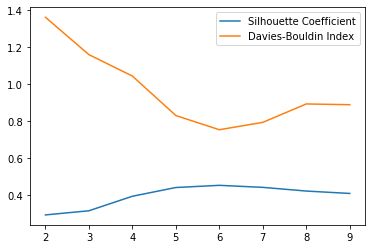

In [45]:
plt.plot(n, si, label="Silhouette Coefficient")
plt.plot(n, db, label="Davies-Bouldin Index")
plt.legend()

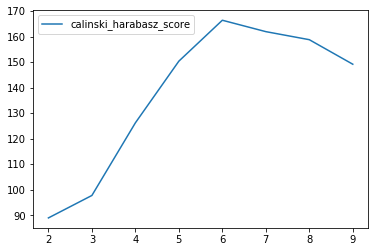

In [46]:
plt.plot(n, ch, label="calinski_harabasz_score")
plt.legend()

best parameter : n_clustering = 5

## 클러스터링 결과 비교

최적의 군집개수가 5개라고 생각되어 n_clusters=5로 plot하였다.
Hierarchical Clustering과 Kmeans Clustering의 결과가 매우 유사하다.

시각적으로 보았을 때, 군집이 잘 형성되었다고 생각되지 않는다.